# CHEM 101.6 Project1

This is a Jupyter notebook for running and analyzing a Molecular Dynamics (MD) simulations of Butane using the OpenMM engine 


# **Setting the environment for MD calculation**

Firstly, we need to install all necessary libraries and packages for our simulation. The main packages we will be installing are:

1.    OpenMM (https://openmm.org/)
2.    PyTraj (https://amber-md.github.io/pytraj/latest/index.html)
4.    Numpy (https://numpy.org/)
5.    Matplotlib (https://matplotlib.org/)
8.    AmberTools (https://ambermd.org/AmberTools.php)

Load libraries in conda enviroment:

conda install -c conda-forge openmm 

conda install -c conda-forge jupyterlab

conda install -c conda-forge mdtraj




In [4]:
import numpy as np
import platform
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
import sys
import openmm as mm
from openmm import app
from openmm import unit
from openmm import *
from openmm.app import *
from openmm.unit import *
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import scipy.stats as stats
import pandas as pd
from statistics import mean, stdev
from matplotlib import colors
import mdtraj as md
import seaborn as sns


In [138]:
workdir='./work2/'
datadir='./data/'
outdir='./out2/'
PDB_file_name = datadir+'butane.pdb'
forcefield_file_name = datadir+'butane.gaff2.xml'

#if not os.path.exists(workDir):
#    os.makedirs(workDir)
    
print(PDB_file_name)
print(forcefield_file_name)

pdb = mm.app.PDBFile(PDB_file_name)
forcefield = mm.app.ForceField(forcefield_file_name)

system = forcefield.createSystem(pdb.topology, nonbondedMethod=mm.app.NoCutoff, constraints=mm.app.HBonds)
integrator = mm.LangevinIntegrator(298.15*kelvin, 5.0/picosecond, 2.0*femtoseconds)
integrator.setConstraintTolerance(1e-5)
platform = mm.Platform.getPlatformByName('Reference')
simulation = app.Simulation(pdb.topology, system, integrator, platform)
simulation.context.setPositions(pdb.positions)

./data/butane.pdb
./data/butane.gaff2.xml


In [6]:
print('Minimizing...')

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")

simulation.minimizeEnergy(maxIterations=100)

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

Minimizing...
Potential energy before minimization is 5.797528692127867 kJ/mol
Potential energy after minimization is 5.295271861905595 kJ/mol


In [7]:
from sys import stdout

print('Equilibrating...')

simulation.reporters.append(app.StateDataReporter(stdout, 1000, step=True, 
    potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(150.0*kelvin)
simulation.step(2500)

Equilibrating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
1000,45.11072067225595,182.30202517892124
2000,35.282775055214856,360.4385124860354


In [8]:
os.path.join(workdir, "butane_sim.xtc")

'./work2/butane_sim.xtc'

In [9]:
# import time as time

# print('Running Production...')

# # Begin timer
# tinit=time.time()

# # Clear simulation reporters
# simulation.reporters.clear()

# # Reinitialize simulation reporters. We do this because we want different information printed from the production run than the equilibration run.
# # output basic simulation information below every 250000 steps - (which is equal to 2 fs(250,000) = 500,000 fs = 500 ps)
# simulation.reporters.append(app.StateDataReporter(stdout, 250000, 
#     step=True, time=True, potentialEnergy=True, temperature=True, 
#     speed=True, separator=','))

# # write out a trajectory (i.e., coordinates vs. time) to a DCD
# # file every 100 steps - 0.2 ps
# simulation.reporters.append(app.XTCReporter(os.path.join(workdir, "butane_sim.xtc"),100))
                
# # run the simulation for 1.0x10^7 steps - 20 ns
# simulation.step(10000000)

# # End timer
# tfinal=time.time()
# print('Done!')
# print('Time required for simulation:', tfinal-tinit, 'seconds')

In [10]:
import mdtraj as md
traj = md.load(os.path.join(workdir, "butane_sim.xtc"), top=PDB_file_name)
traj


<mdtraj.Trajectory with 100000 frames, 14 atoms, 1 residues, without unitcells at 0x1bbeb391210>

In [11]:
atoms, bonds = traj.topology.to_dataframe()
atoms

serial name element  resSeq resName  chainID segmentID
0        1   C1       C       1     NBU        0          
1        2  H11       H       1     NBU        0          
2        3  H12       H       1     NBU        0          
3        4  H13       H       1     NBU        0          
4        5   C2       C       1     NBU        0          
5        6  H21       H       1     NBU        0          
6        7  H22       H       1     NBU        0          
7        8   C3       C       1     NBU        0          
8        9  H31       H       1     NBU        0          
9       10  H32       H       1     NBU        0          
10      11   C4       C       1     NBU        0          
11      12  H41       H       1     NBU        0          
12      13  H42       H       1     NBU        0          
13      14  H43       H       1     NBU        0

In [12]:
#Lets select the topology
top=traj.topology
top

<mdtraj.Topology with 1 chains, 1 residues, 14 atoms, 13 bonds at 0x1bbec816a10>

In [13]:
C_sel=top.select("type C")
print(C_sel)
top.atom(10)
for atom in C_sel:
    print(atom,top.atom(atom))

H_sel=top.select("type H")
for atom in H_sel:
    print(atom,top.atom(atom))

[ 0  4  7 10]
0 NBU1-C1
4 NBU1-C2
7 NBU1-C3
10 NBU1-C4
1 NBU1-H11
2 NBU1-H12
3 NBU1-H13
5 NBU1-H21
6 NBU1-H22
8 NBU1-H31
9 NBU1-H32
11 NBU1-H41
12 NBU1-H42
13 NBU1-H43


In [14]:
#Select All Carbon Atoms
C_sel=top.select("type C")
print(C_sel)
#Confirm that we have selected what we think we have
for atom in C_sel:
    print(top.atom(atom))

[ 0  4  7 10]
NBU1-C1
NBU1-C2
NBU1-C3
NBU1-C4


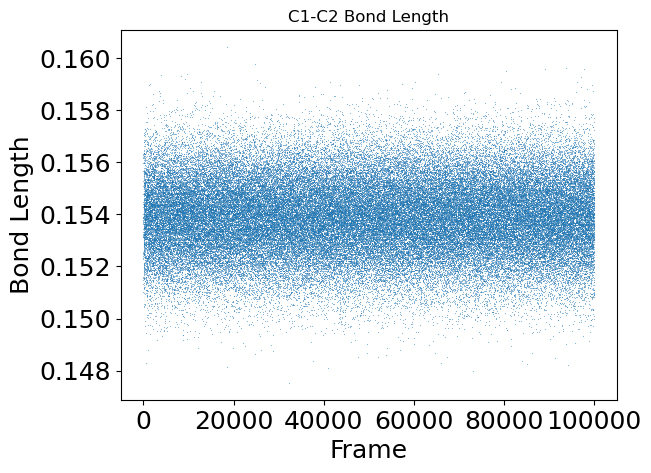

In [15]:
#Compute Some Distances and plot the time course
bond_indices = [0, 4] 
# defining the variable with all C1 and C2 bondlengths in the trajectory 
C1C2bondlength = md.compute_distances(traj, [bond_indices])
#plt.plot(C1C2bondlength,linewidth=1)
plt.plot(C1C2bondlength,linewidth=0,marker='x',markersize=.1)
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
#plt.xlim([0,1000])

plt.yticks(size=18)
plt.ylabel('Bond Length', size=18)
plt.title('C1-C2 Bond Length')
plt.show()

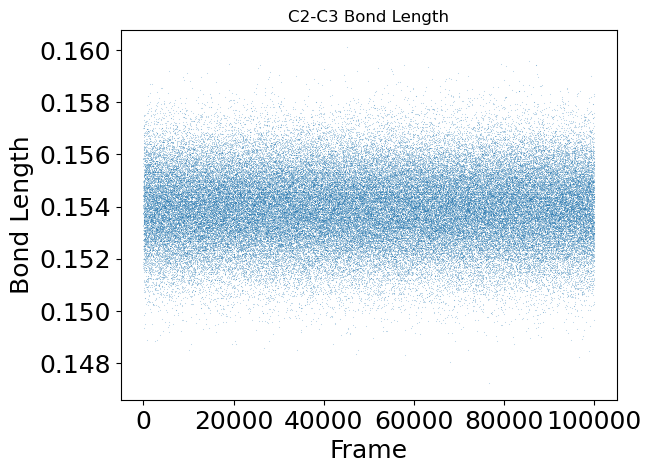

In [16]:
bond_indices = [4, 7] 
C2C3bondlength = md.compute_distances(traj, [bond_indices])
#plt.plot(C2C3bondlength)
plt.plot(C2C3bondlength,linewidth=0,marker='x',markersize=.05)
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('Bond Length', size=18)
plt.title('C2-C3 Bond Length')
plt.show()

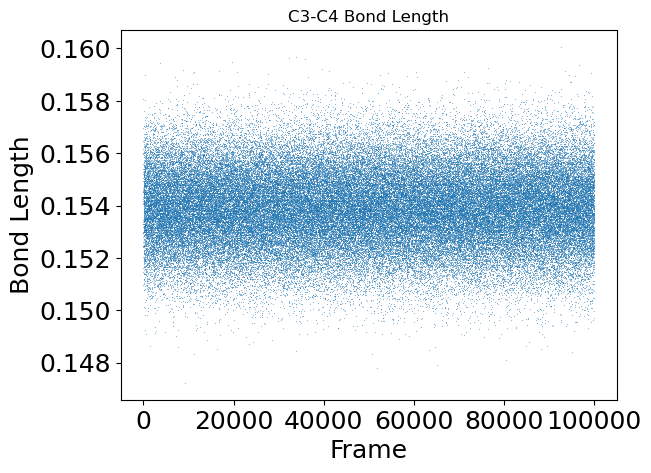

In [17]:
bond_indices = [7, 10] 
C3C4bondlength = md.compute_distances(traj, [bond_indices])
#plt.plot(C3C4bondlength)
plt.plot(C3C4bondlength,linewidth=0,marker='x',markersize=.1)
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('Bond Length', size=18)
plt.title('C3-C4 Bond Length')
plt.show()

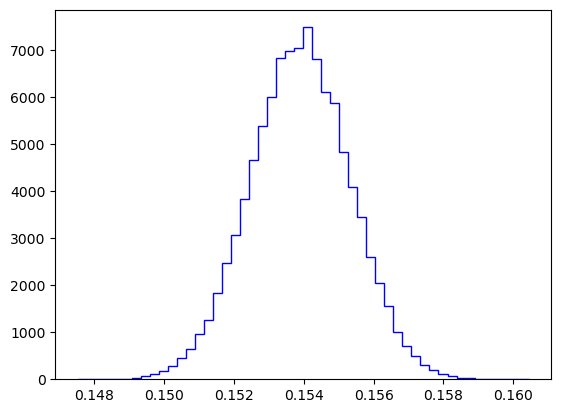

In [18]:
plt.hist(C1C2bondlength,label='C1-C2',color='b',histtype='step',bins=50)
plt.show()

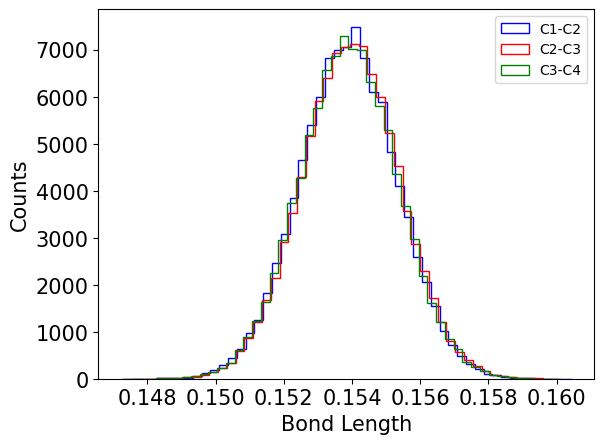

In [19]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
plt.hist(C1C2bondlength,label='C1-C2',color='b',histtype='step',bins=50)
plt.hist(C2C3bondlength,label='C2-C3',color='r',histtype='step',bins=50)
plt.hist(C3C4bondlength,label='C3-C4',color='g',histtype='step',bins=50)
plt.legend(loc='upper right')
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Counts', size=15)
plt.yticks(size=15)
plt.show()

Lets Write Functions to Calculate the Variance ($\sigma^2$) and Standard Deviation ($\sigma$)

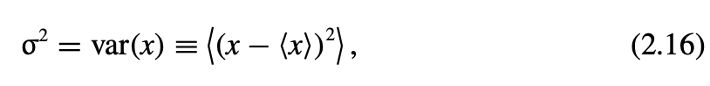

In [20]:
######Class Activtiy: Calculate the Variance and Standard Deviation of Each Bond Length######


In [21]:
###SOLUTION###
def variance(data):
    ave=np.average(data)
    var= np.average((data-ave)**2)
    std=var**0.5
    return var,std

C1C2var,C1C2std=variance(C1C2bondlength)
C2C3var,C2C3std=variance(C2C3bondlength)
C3C4var,C3C4std=variance(C3C4bondlength)

print("C1-C2 variance:",C1C2var,"C1-C2 standard deviation:",C1C2std)
print("C2-C3 variance:",C2C3var,"C1-C2 standard deviation:",C2C3std)
print("C3-C4 variance:",C2C3var,"C1-C2 standard deviation:",C3C4std)

C1-C2 variance: 2.041398e-06 C1-C2 standard deviation: 0.0014287749717987205
C2-C3 variance: 2.0460454e-06 C1-C2 standard deviation: 0.001430400446715707
C3-C4 variance: 2.0460454e-06 C1-C2 standard deviation: 0.0014297129468600546


In [22]:
#Lets Check Our Answers with the Built In Numpy Libraries
print("C1-C2 average:",np.average(C1C2bondlength),"variance:",np.var(C1C2bondlength),"std-dev:",np.std(C1C2bondlength))
print("C2-C3 average:",np.average(C2C3bondlength),"variance:",np.var(C2C3bondlength),"std-dev:",np.std(C2C3bondlength))
print("C3-C4 average:",np.average(C3C4bondlength),"variance:",np.var(C3C4bondlength),"std-dev:",np.std(C3C4bondlength))

C1-C2 average: 0.15389855 variance: 2.041398e-06 std-dev: 0.001428775
C2-C3 average: 0.15394811 variance: 2.0460454e-06 std-dev: 0.0014304004
C3-C4 average: 0.1538971 variance: 2.044079e-06 std-dev: 0.001429713


***Class Activity: Lets Check if These Bond Lengths Are Correlated and Calculate the Coerrleation Coefficents***

***First Calculate a Best Fit Line****

We can do this using the np.polyfit function:

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

***Now Calculate the Perason Correlation Coefficient***
We can use numpy to calculate the correlation coeffient 

https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html

This function works for n-arrays, so it will report correlation coefficient matrix, and we need to select our coefficient of interest, which in our case is the off diagnol  


In [23]:
#Switch to a 1D array 
np.shape(C1C2bondlength[:,0])

(100000,)

Line Parameters: [0.50013738 0.07697374]


C:\Users\hainn\AppData\Local\Temp\ipykernel_17100\857115658.py:9: RankWarning: Polyfit may be poorly conditioned
  line_fit=np.polyfit(C1C2bondlength[:,0],C2C3bondlength[:,0],1)


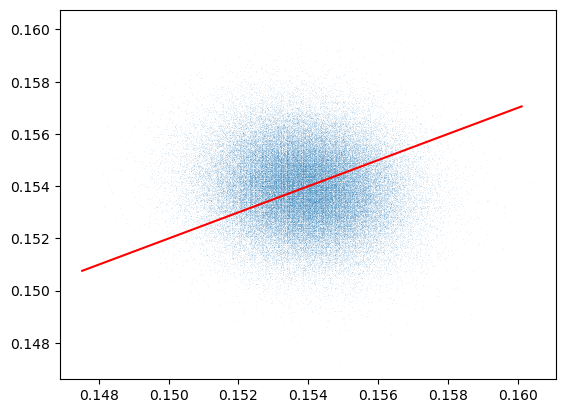

r2: -0.09861455111170242
Line Parameters: [0.49997395 0.07694858]


C:\Users\hainn\AppData\Local\Temp\ipykernel_17100\857115658.py:22: RankWarning: Polyfit may be poorly conditioned
  line_fit=np.polyfit(C1C2bondlength[:,0],C3C4bondlength[:,0],1)


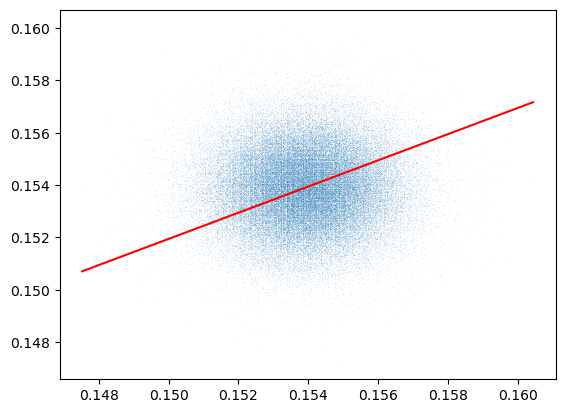

r2: 0.009127007169177982
Line Parameters: [0.49981051 0.07694821]


C:\Users\hainn\AppData\Local\Temp\ipykernel_17100\857115658.py:34: RankWarning: Polyfit may be poorly conditioned
  line_fit=np.polyfit(C2C3bondlength[:,0],C3C4bondlength[:,0],1)


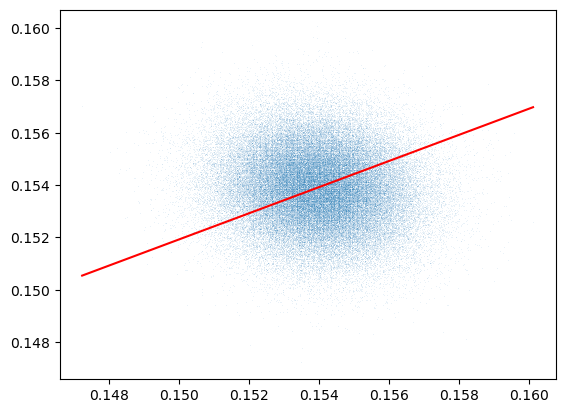

r2: -0.1021295512378554


In [24]:
#####Are these bond lengths correlated?##### 
###Calculate and plot a best fit line, and calculate the correlation coefficient####

plt.scatter(C1C2bondlength,C2C3bondlength,marker='x',s=0.1,linewidth=0.05)

#######SOLUTION###########


line_fit=np.polyfit(C1C2bondlength[:,0],C2C3bondlength[:,0],1)
x = np.linspace(min(C1C2bondlength[:,0]), max(C2C3bondlength[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()
plt.clf()

r=np.corrcoef(C1C2bondlength[:,0], C2C3bondlength[:,0])
print("r2:",r[0,1])

plt.scatter(C1C2bondlength,C3C4bondlength,marker='x',s=0.1,linewidth=0.05)

line_fit=np.polyfit(C1C2bondlength[:,0],C3C4bondlength[:,0],1)
x = np.linspace(min(C1C2bondlength[:,0]), max(C1C2bondlength[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()

r=np.corrcoef(C1C2bondlength[:,0], C3C4bondlength[:,0])
print("r2:",r[0,1])

plt.scatter(C2C3bondlength,C3C4bondlength,marker='x',s=0.1,linewidth=0.05)

line_fit=np.polyfit(C2C3bondlength[:,0],C3C4bondlength[:,0],1)
x = np.linspace(min(C2C3bondlength[:,0]), max(C2C3bondlength[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()

r=np.corrcoef(C2C3bondlength[:,0], C3C4bondlength[:,0])
print("r2:",r[0,1])


C:\Users\hainn\AppData\Local\Temp\ipykernel_17100\689458838.py:5: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = False
c:\Users\hainn\anaconda3\envs\CHEM101\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hainn\anaconda3\envs\CHEM101\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hainn\anaconda3\envs\CHEM101\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

<Figure size 640x480 with 0 Axes>

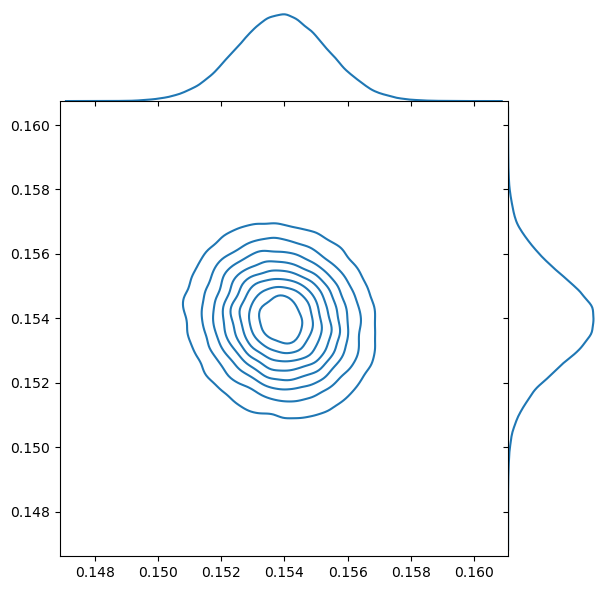

In [25]:
import seaborn as sns
import pandas as pd

# Disable the use_inf_as_na option
pd.options.mode.use_inf_as_na = False

plt.clf()
sns.jointplot(x=C1C2bondlength[:,0],y=C2C3bondlength[:,0],kind='kde',space=0,thresh=0)

C:\Users\hainn\AppData\Local\Temp\ipykernel_17100\1751449604.py:5: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = False
c:\Users\hainn\anaconda3\envs\CHEM101\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hainn\anaconda3\envs\CHEM101\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

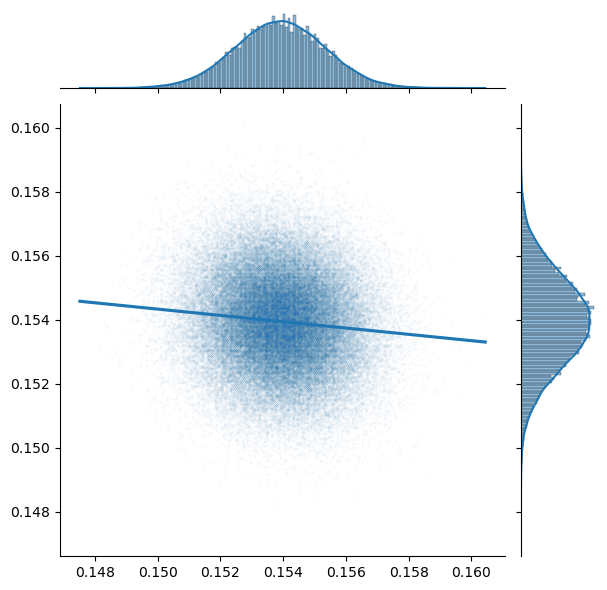

In [26]:
import seaborn as sns
import pandas as pd

# Disable the use_inf_as_na option
pd.options.mode.use_inf_as_na = False

plt.clf()
sns.jointplot(x=C1C2bondlength[:,0],y=C2C3bondlength[:,0],kind='reg',scatter_kws={'s':0.001})

**WEEK 1 Homework Question:  Why does one pair of these bonds appear slightly more correlated than the other?**

HERE IS MY ANSWER

The C1C2bondlength:C2C3bondlength with r^2 value of -0.09861455111170242 appears more slightly correlated than the C1C2bondlength:C3C4bondlength  with r^2 value of 0.009127007169177982 because the C1C2bondlength:C2C3bondlength are closer than the C1C2bondlength:C3C4bondlength. Also, the shorter distance of C1C2bondlength:C2C3bondlength allows for stronger steric interactions between the C1-C2 and C2-C3 bonds compared to  the C1-C2 and C3-C4 bonds and this can explain the difference in correlation.

***Class Activity*** 

***Lets write a function to calculate the histogram, return the density and centers
and fit a guassian to each of these distributions?***

Lets Turn these histograms into a probability densities and then fit them to a
normal (Gaussian) Distribution

https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

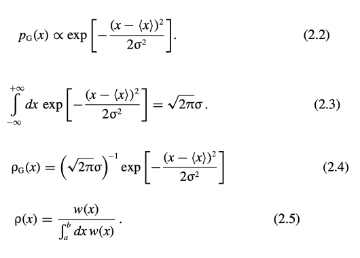
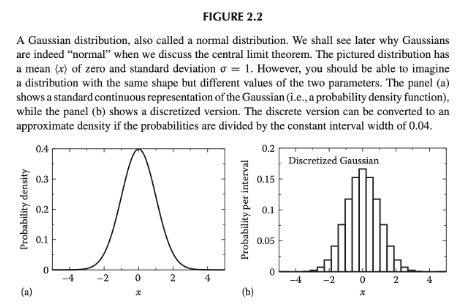

[    1     5    21    99   455  1281  3189  6644 11358 16028 17844 16670
 12498  7810  3888  1532   498   139    31     8] [0.147   0.14765 0.1483  0.14895 0.1496  0.15025 0.1509  0.15155 0.1522
 0.15285 0.1535  0.15415 0.1548  0.15545 0.1561  0.15675 0.1574  0.15805
 0.1587  0.15935 0.16   ]
a: 0.1800481253350633 x_0: 0.153901369505271 fit_sigma: -0.0014403723024021984


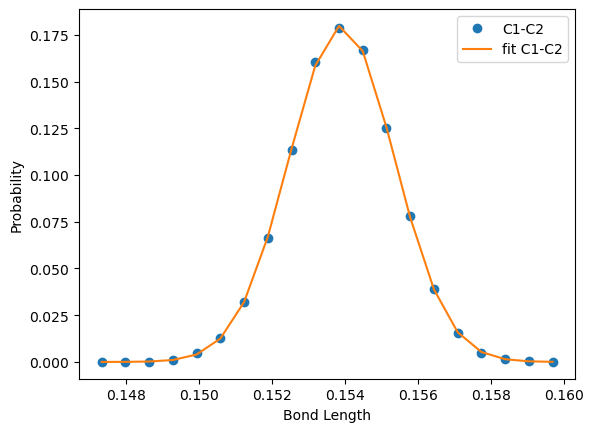

In [91]:
#Lets calculate a Probability Density and fit a gaussian to these
#First lets pull out the data in a formate we can fit
#https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

from scipy.optimize import curve_fit

####SOLUTION####

#First we convery our histogram into bin centers and probabilities
#isntead of bin edges and counts:

counts, edges = np.histogram(C1C2bondlength,bins=20,range=[0.147,0.160])
print(counts,edges)
centers = edges[:-1] + np.diff(edges)/2
density=counts/(np.sum(counts))

### THIS IS WHAT YOU WANT TO TURN INTO A FUNCTION FOR HOMEWORK ####

###Now we define a gaussian function that we'll fit to our probability densities
def gauss(x,a, x0, sigma):
    return(a*np.exp(-(x-x0)**2/(2*sigma**2)))

#### Now we define a function to fit the gaussian with curve fit

def fit_gauss(x,y):
    parameters, covariance = curve_fit(gauss,x,y)
    fit_a = parameters[0]
    fit_x0 = parameters[1]
    fit_sigma = parameters[2]
    print("a:",fit_a,"x_0:",fit_x0,"fit_sigma:",fit_sigma)
    fit_y = gauss(x,fit_a,fit_x0,fit_sigma)
    return fit_y,[fit_a,fit_x0,fit_sigma]


C1C2_fit,C1C2_fit_params=fit_gauss(centers,density)

plt.plot(centers,density,'o',label='C1-C2')
plt.plot(centers,C1C2_fit,'-',label='fit C1-C2')
plt.legend()
plt.xlabel('Bond Length')
plt.ylabel('Probability')
plt.show()

#C1C2_density,centers=histogram_bincenters(C1C2bondlength,0.147,0.160,20)


a: 0.1800481253350633 x0: 0.153901369505271 fit_sigma: -0.0014403723024021984


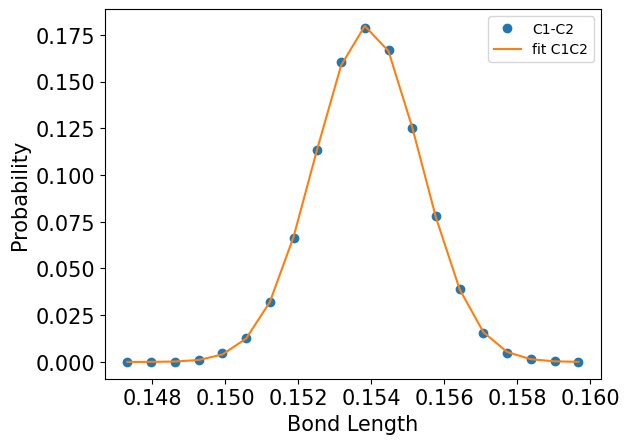

In [92]:
#Lets calculate a Probability Density and fit a gaussian to these
#First lets pull out the data in a formate we can fit
#https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

from scipy.optimize import curve_fit

####SOLUTION####

#First we convery our histogram into bin centers and probabilities
#isntead of bin edges and counts:

### THIS IS WHAT YOU WANT TO TURN INTO A FUNCTION FOR HOMEWORK ####
counts, edges = np.histogram(C1C2bondlength, bins=20, range=[0.147,0.160])
centers = edges[:-1] + np.diff(edges)/2
density=counts/np.sum(counts)


###Now we define a gaussian function that we'll fit to our probability densities

def gauss(x, a, x0, sigma):
    return (a*np.exp(-(x-x0)**2/(2*sigma**2)))

#### Now we define a function to fit the gaussian with curve fit

def fit_gauss(x,y):
    parameters, covariance = curve_fit(gauss, x, y)
    fit_a = parameters[0]
    fit_x0 = parameters[1]
    fit_sigma = parameters[2]
    print("a:",fit_a,"x0:",fit_x0,"fit_sigma:",fit_sigma)
    fit_y = gauss(centers, fit_a, fit_x0,fit_sigma)
    return fit_y,[fit_a,fit_x0,fit_sigma] 

#C1C2_density,centers=histogram_bincenters(C1C2bondlength,0.147,0.160,20)
C1C2_fit,C1C2_fit_params=fit_gauss(centers,density)

plt.plot(centers, density, 'o', label='C1-C2')
plt.plot(centers, C1C2_fit, '-', label='fit C1C2')


plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.show()


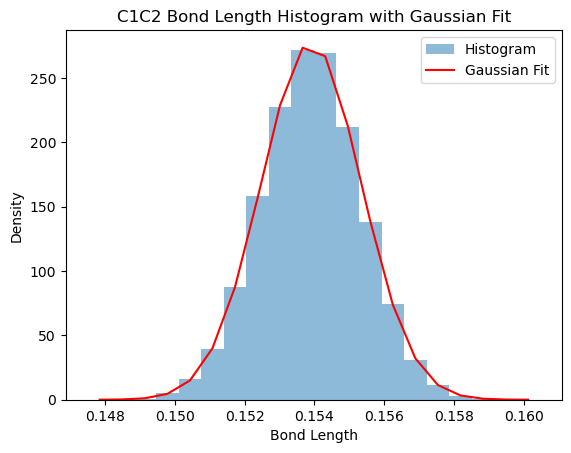

Density: [6.19185422e-02 2.94113075e-01 9.28778133e-01 5.21663718e+00
 1.60988210e+01 3.95040299e+01 8.74754205e+01 1.58108998e+02
 2.27457765e+02 2.71924485e+02 2.69717170e+02 2.12055527e+02
 1.38372462e+02 7.44880063e+01 3.06187191e+01 1.15478081e+01
 3.14236602e+00 7.43022506e-01 1.85755627e-01 1.54796356e-02]
Centers of bins: [0.14784592 0.14849192 0.14913794 0.14978394 0.15042996 0.15107596
 0.15172198 0.15236798 0.153014   0.15366001 0.15430602 0.15495205
 0.15559804 0.15624407 0.15689006 0.15753609 0.15818208 0.15882811
 0.1594741  0.16012013]
Parameters of Gaussian fit (mean, std dev, amplitude): [1.53905687e-01 1.43724474e-03 2.77494382e+02]


In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def gaussian(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

def fit_histogram_with_gaussian(C1C2bondlength, bins=20, plot=True, range_=None, **kwargs):
    # Extracting additional parameters
    title = kwargs.get('title', '')
    
    # Calculate histogram
    if range_ is None:
        range_ = (np.min(C1C2bondlength), np.max(C1C2bondlength))
    counts, edges = np.histogram(C1C2bondlength, bins=bins, range=range_, density=True)
    centers = (edges[:-1] + edges[1:]) / 2
    density = counts/np.sum(counts)
    
    # Fit a Gaussian to the histogram
    popt, _ = curve_fit(gaussian, centers, counts, p0=[np.mean(C1C2bondlength), np.std(C1C2bondlength), 1])
    
    # Plot the histogram and fitted Gaussian
    if plot:
        plt.hist(C1C2bondlength, bins=bins, range=range_, density=True, alpha=0.5, label='Histogram')
        plt.plot(centers, gaussian(centers, *popt), 'r-', label='Gaussian Fit')
        plt.legend()
        plt.xlabel('Bond Length')
        plt.ylabel('Density')
        plt.title(title)
        plt.show()
    
    return counts, centers, popt

# Example usage:
# C1C2bondlength = np.random.normal(loc=0.15390436696837315, scale=0.0013950701832143493, size=1000) # Generate some random data
counts, centers, params = fit_histogram_with_gaussian(C1C2bondlength, bins=20, title='C1C2 Bond Length Histogram with Gaussian Fit')
print("Density:", counts)
print("Centers of bins:", centers)
print("Parameters of Gaussian fit (mean, std dev, amplitude):", params)


***Homework Porblem 1:  Can you write a function to calculate the histogram, return the density and centers
and fit a guassian to each of these distributions?***

a: 0.18004850977689651 x0: 0.1539013690069528 fit_sigma: 0.0014403676120164361
a: 0.17996720903986405 x0: 0.15394918552980125 fit_sigma: -0.0014406271748602392
a: 0.17984755146616369 x0: 0.1538950747355996 fit_sigma: -0.0014419053065061306


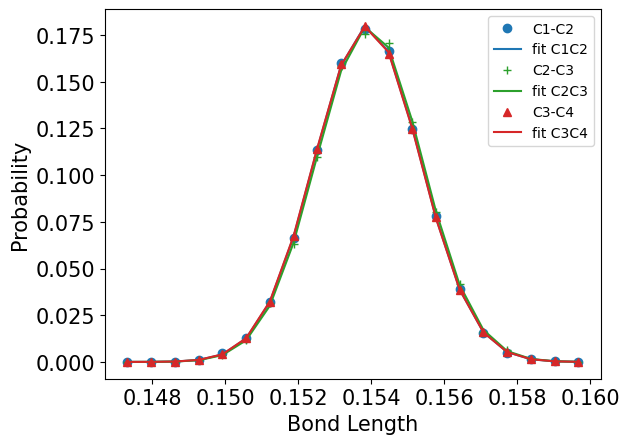

In [94]:
#Can you write a function to calculate the histogram, return the density and centers,
#and then fit a guassian to each of these distributions? 

####HOMEWORK SOLUTION####
#def histogram_bincenters:
####ADD YOUR CODE HERE #####
#  return centers,density 

#USE THE FUNCTION TO ITERATE OVER ALL CC BONDS, plot the densities and the fits 

def histogram_bincenters(bondlength, bins=20, range_=None):    
    # Calculate histogram
    if range_ is None:
        range_ = (np.min(bondlength), np.max(bondlength))
        
    counts, edges = np.histogram(bondlength, bins=bins, range=range_, density=True)
    centers = (edges[:-1] + edges[1:]) / 2
    density = counts/np.sum(counts)
    return centers, density


centers, density = histogram_bincenters(C1C2bondlength, bins=20, range_=[0.147,0.160])
C1C2_fit,C1C2_fit_params=fit_gauss(centers,density)
plt.plot(centers, density, 'o', label='C1-C2', color="tab:blue")
plt.plot(centers, C1C2_fit, '-', label='fit C1C2', color="tab:blue")

centers, density = histogram_bincenters(C2C3bondlength, bins=20, range_=[0.147,0.160])
C2C3_fit,C2C3_fit_params=fit_gauss(centers,density)
plt.plot(centers, density, '+', label='C2-C3', color="tab:green")
plt.plot(centers, C2C3_fit, '-', label='fit C2C3', color="tab:green")

centers, density = histogram_bincenters(C3C4bondlength, bins=20, range_=[0.147,0.160])
C3C4_fit,C3C4_fit_params=fit_gauss(centers,density)
plt.plot(centers, density, '^', label='C3-C4', color="tab:red")
plt.plot(centers, C3C4_fit, '-', label='fit C3C4', color="tab:red")


plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.show()

**Week 1 Homework Problem #2: convert these probability distributions to culmulative distribution functions**

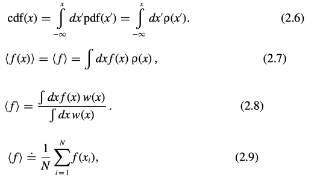

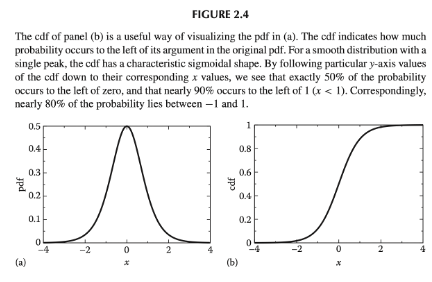

In [31]:
###WEEK 1 HOMEWORK#### 

####HOMEWORK SOLUTION####

#TRY THIS FUNCTION:
#https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html
#ADD CODE FOR CDFs HERE#

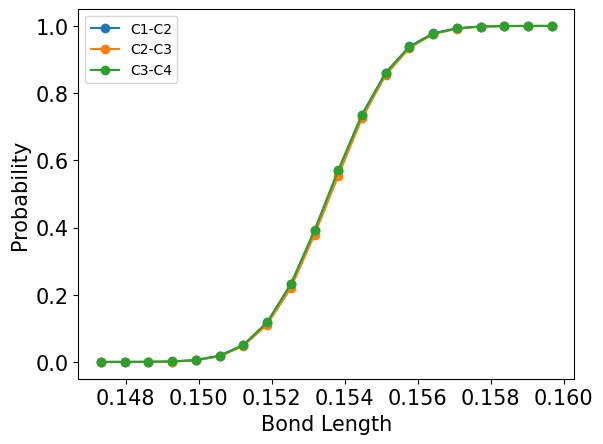

In [95]:
import numpy as np

def pdf_to_cdf(pdf):
   
    cdf = np.cumsum(pdf)
    return cdf

# cdf for C1C2bondlength
centers, density = histogram_bincenters(C1C2bondlength, bins=20, range_=[0.147,0.160])
cdf = pdf_to_cdf(density)
plt.plot(centers, cdf, 'o', linestyle="-", label='C1-C2')

# cdf for C2C3bondlength
centers, density = histogram_bincenters(C2C3bondlength, bins=20, range_=[0.147,0.160])
cdf = pdf_to_cdf(density)
plt.plot(centers, cdf, 'o', linestyle="-", label='C2-C3')

# cdf for C3C4bondlength
centers, density = histogram_bincenters(C3C4bondlength, bins=20, range_=[0.147,0.160])
cdf = pdf_to_cdf(density)
plt.plot(centers, cdf, 'o', linestyle="-", label='C3-C4')

plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.show()


**WEEK 1 Homework Problem #3: Lets draw some random frames from our trajectory (for example 10,100,1000,10000),  calculate the probability distribution functions for 4 of these random samples, and fit  gaussians to these probability distirbution functions for 1) A Bond Angle 3) A Dihedral Angle.  Why is the Gaussian fit for a dihedral so poor with a large sample? ***


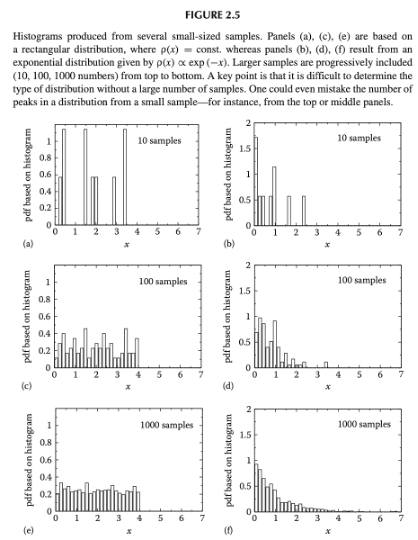

(array([1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
        0., 1., 2.]),
 array([0.15165094, 0.15182225, 0.15199359, 0.15216491, 0.15233622,
        0.15250754, 0.15267888, 0.1528502 , 0.15302151, 0.15319285,
        0.15336417, 0.15353549, 0.15370682, 0.15387814, 0.15404946,
        0.15422079, 0.15439211, 0.15456343, 0.15473475, 0.15490608,
        0.1550774 ]),
 [<matplotlib.patches.Polygon at 0x1bbf6f6d550>])

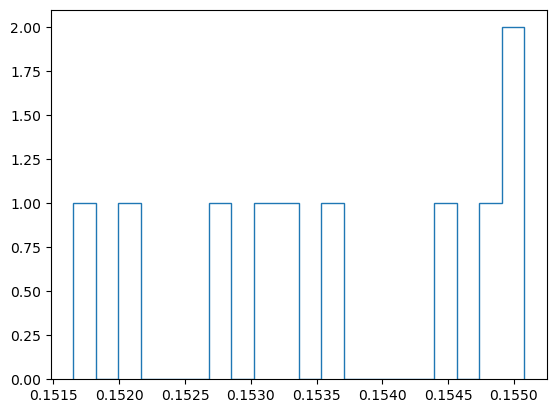

In [33]:
#ADD CODE FOR FITTING GUASSIAN FUNCTIONS TO RANDOM SAMPLES  HERE#
#Draw 10,100,1000 random samples of a bond angle - FIT THEM TO BOND LENGTH

#This function might be helpful:
rands=np.random.randint(100000, size=(10))
rands
C1C2bond=C1C2bondlength[:,0]
C1C2bond[rands]
plt.hist(C1C2bond[rands],bins=20,histtype='step')
#Draw 10,100,1000,10000 random samples of a dihedral angle - FIT THEM TO A GAUSSIAN - WHY IS THIS FIT SO POOR?


Frame number selected: 10
a: 0.17120811068549618 x0: 0.1543583526340222 fit_sigma: 0.0014687524815271147
a: -1.6650457395199745 x0: -1.7858420147388534 fit_sigma: 0.13958384187700124
a: 0.1014576411947952 x0: 0.15439320042822727 fit_sigma: 0.0026925129713413283


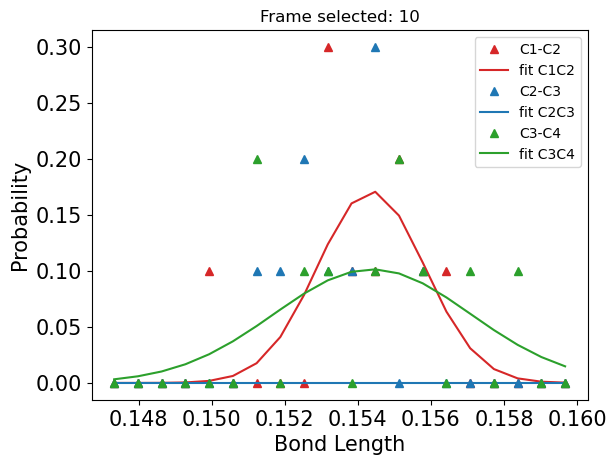

Frame number selected: 100
a: 0.1953506168767349 x0: 0.15397578603421366 fit_sigma: -0.0013078560149917865
a: 0.18957178214697432 x0: 0.15398139713091644 fit_sigma: 0.0013844839144092624
a: 0.17622892729454048 x0: 0.15400295800255007 fit_sigma: -0.001424361077879576


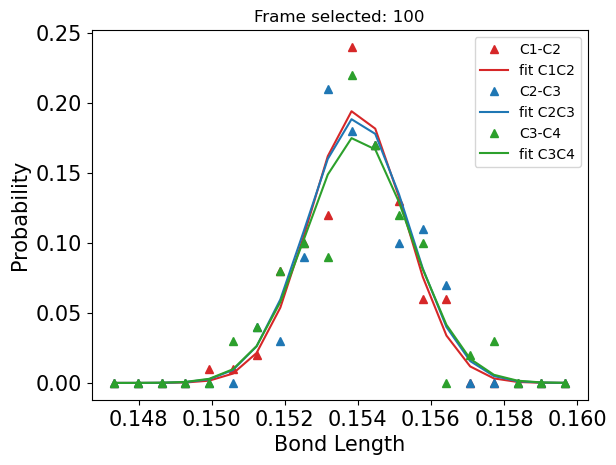

Frame number selected: 1000
a: 0.18124553406645585 x0: 0.15387993887708504 fit_sigma: -0.0014353508446134666
a: 0.1839685572386427 x0: 0.1539499990443323 fit_sigma: -0.0014078304028675363
a: 0.1895703317016745 x0: 0.15374708724652486 fit_sigma: 0.0013429330129719173


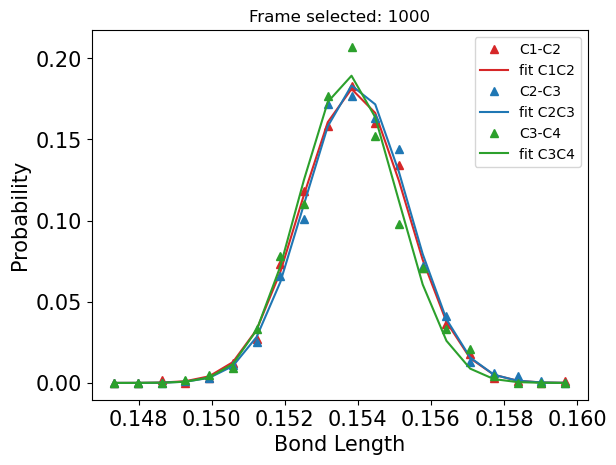

Frame number selected: 10000
a: 0.17911907710514643 x0: 0.15392282588982129 fit_sigma: 0.001447783667218533
a: 0.17786583204855522 x0: 0.15391785106780353 fit_sigma: -0.0014623207252079315
a: 0.18279190809963183 x0: 0.1538858208723283 fit_sigma: -0.0014193916258680545


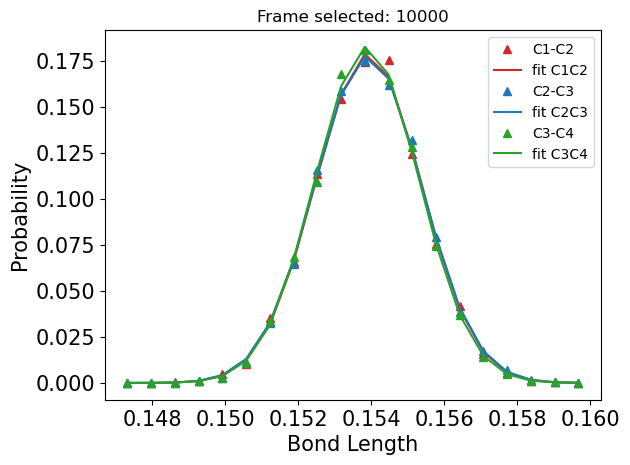

<Figure size 640x480 with 0 Axes>

In [37]:
#Draw 10,100,1000 random samples of a bond length,

#This function might be helpful:
rands=np.random.randint(10000, size=(10))
rands

#ADD CODE FOR Random Samples here#
#Draw 10,100,1000 random samples of a bond length,

#This function might be helpful:
frame_length = [10,100,1000,10000]
for i in frame_length:
    rands=np.random.randint(10000, size=(i))
    print('Frame number selected: ' + str(i))
    
    
    C1C2_short = C1C2bondlength[rands]
    centers, density = histogram_bincenters(C1C2_short, bins=20, range_=[0.147,0.160])
    C1C2_short_fit, C1C2_short_fit_params = fit_gauss(centers,density)
    plt.plot(centers, density, '^', label='C1-C2', color="tab:red")
    plt.plot(centers, C1C2_short_fit, '-', label='fit C1C2', color="tab:red")

    C2C3_short = C2C3bondlength[rands]
    centers, density = histogram_bincenters(C2C3_short, bins=20, range_=[0.147,0.160])
    C2C3_short_fit, C2C3_short_fit_params = fit_gauss(centers,density)
    plt.plot(centers, density, '^', label='C2-C3', color="tab:blue")
    plt.plot(centers, C2C3_short_fit, '-', label='fit C2C3', color="tab:blue")

    C3C4_short = C3C4bondlength[rands]
    centers, density = histogram_bincenters(C3C4_short, bins=20, range_=[0.147,0.160])
    C3C4_short_fit, C3C4_short_fit_params = fit_gauss(centers,density)
    plt.plot(centers, density, '^', label='C3-C4', color="tab:green")
    plt.plot(centers, C3C4_short_fit, '-', label='fit C3C4', color="tab:green")


  

    plt.legend()
    plt.title('Frame selected: ' + str(i))
    plt.xlabel('Bond Length', size=15)
    plt.xticks(size=15)
    plt.ylabel('Probability', size=15)
    plt.yticks(size=15)
    plt.show()
    plt.clf()

In [38]:
atoms, bonds = traj.topology.to_dataframe()
atoms

serial name element  resSeq resName  chainID segmentID
0        1   C1       C       1     NBU        0          
1        2  H11       H       1     NBU        0          
2        3  H12       H       1     NBU        0          
3        4  H13       H       1     NBU        0          
4        5   C2       C       1     NBU        0          
5        6  H21       H       1     NBU        0          
6        7  H22       H       1     NBU        0          
7        8   C3       C       1     NBU        0          
8        9  H31       H       1     NBU        0          
9       10  H32       H       1     NBU        0          
10      11   C4       C       1     NBU        0          
11      12  H41       H       1     NBU        0          
12      13  H42       H       1     NBU        0          
13      14  H43       H       1     NBU        0

**Class Activity: Lets Compute the 2 C-C-C Bond Anlges and C-C-C-C Dihedral Angle ***

Plot their histograms.  Find a nice way to visualize the C-C-C-C dihedral angle 

(100000, 2)
[[1.8561319 1.8410031]
 [2.022321  1.9602604]
 [2.0214653 1.9941894]
 ...
 [1.9835722 1.9448099]
 [1.93657   1.9164178]
 [1.9462966 1.9813364]]


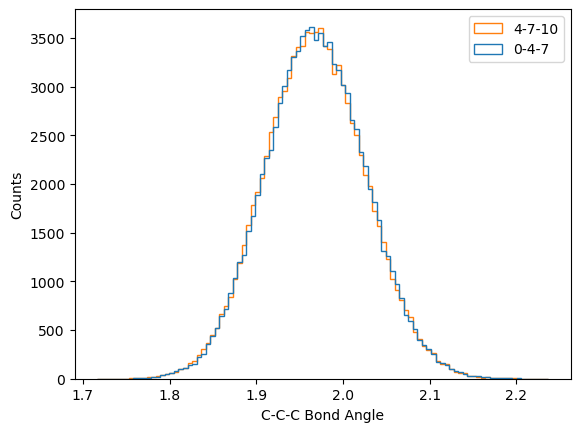

[[-3.017584 ]
 [ 2.8320909]
 [-3.0726972]
 ...
 [-2.9303384]
 [-2.9034324]
 [ 2.9167614]]
[[-172.89482]
 [ 162.26685]
 [-176.05257]
 ...
 [-167.89601]
 [-166.35442]
 [ 167.1181 ]]


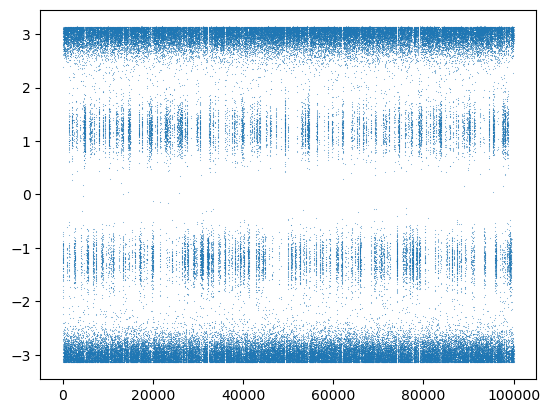

In [39]:
###Class Room Solution###
##Lets Compute Some Bond Angles & Torsions##
Angle1=[0,4,7]
Angle2=[4,7,10]

ang = md.compute_angles(traj,[Angle1,Angle2])
print(np.shape(ang))
print(ang)

ang1=ang[:,0]
ang2=ang[:,1]

plt.plot(ang1,linewidth=0,marker='x',markersize=.1)
plt.plot(ang2,linewidth=0,marker='x',markersize=.1)
plt.clf()

plt.hist(ang,bins=100,histtype='step',label=['0-4-7','4-7-10'])
plt.legend()
plt.xlabel('C-C-C Bond Angle')
plt.ylabel('Counts')
plt.show()
#plt.scatter(ang1,marker='o',s=0.1)

CCCC_index=[10,7,4,0]
CCCC_torsion=md.compute_dihedrals(traj, [CCCC_index])
print(CCCC_torsion)
print(np.rad2deg(CCCC_torsion))

plt.plot(CCCC_torsion,marker='x',markersize=.1,linewidth=0)
#plt.xlim([0,100])

(0.0, 1000.0)

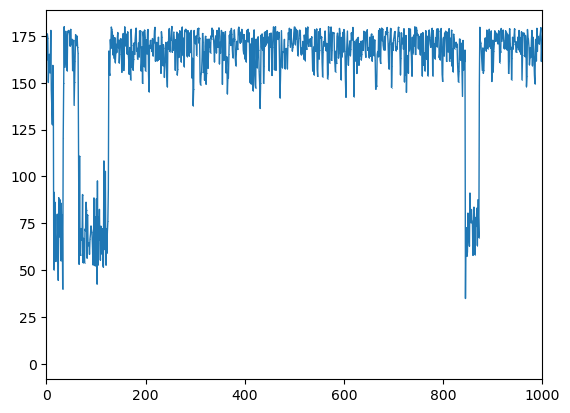

In [40]:
#print(np.where(CCCC_torsion<=0))
CCCC_tor_offset=np.rad2deg(CCCC_torsion)
#print(CCCC_tor_offset)
#for i in range(0,len(CCCC_tor_offset)):
#    if(CCCC_tor_offset[i]<0):
#        CCCC_tor_offset[i]+=360
        
plt.plot(np.abs(CCCC_tor_offset),marker='x',markersize=.1,linewidth=1)
plt.xlim([0,1000])

In [45]:
def fit_gauss(x, y):
    # Initial guess for parameters
    max_y = np.max(y)
    mean_x = np.mean(x)
    std_x = np.std(x)
    initial_guess = [max_y, mean_x, std_x]

    # Perform curve fitting
    try:
        parameters, covariance = curve_fit(gaussian, x, y, p0=initial_guess, maxfev=10000)
        fit_a = parameters[0]
        fit_x0 = parameters[1]
        fit_sigma = parameters[2]
        print("a:", fit_a, "x0:", fit_x0, "fit_sigma:", fit_sigma)
        fit_y = gaussian(x, fit_a, fit_x0, fit_sigma)
        return fit_y, [fit_a, fit_x0, fit_sigma]
    except RuntimeError:
        print("Optimal parameters not found. Try adjusting initial guesses or increasing maxfev.")
        return None, None


Frame number selected: 10
a: 6.911794086312761 x0: -3.254602351943129 fit_sigma: 0.11492068363361893


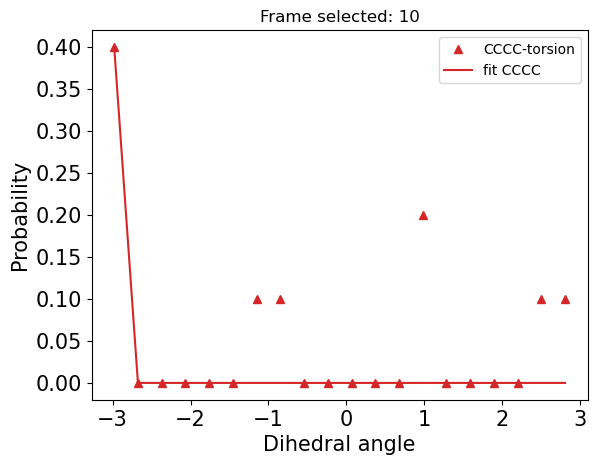

Frame number selected: 100
a: 0.3557543961577604 x0: -3.0641328305897075 fit_sigma: -0.26743498334556043


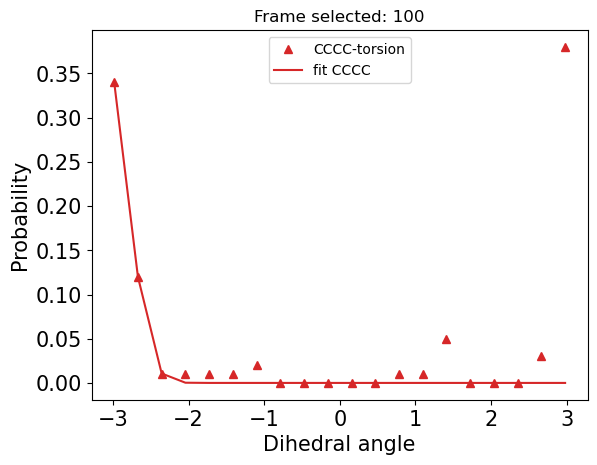

Frame number selected: 1000
a: 0.41092383619494643 x0: -3.121737295651485 fit_sigma: -0.24437985959754813


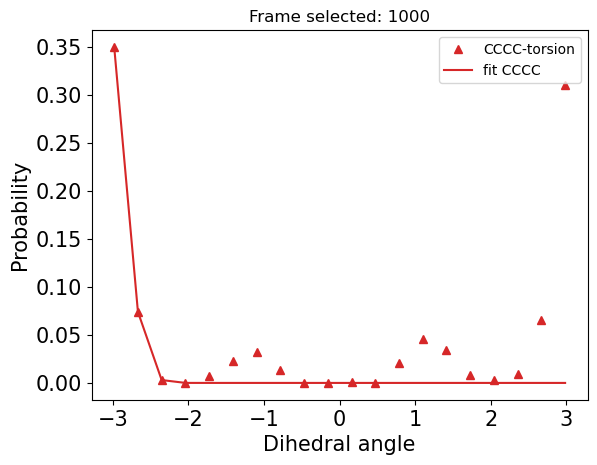

Frame number selected: 10000
a: 2.653325089334101 x0: -3.8626028803896384 fit_sigma: -0.43483525261746214


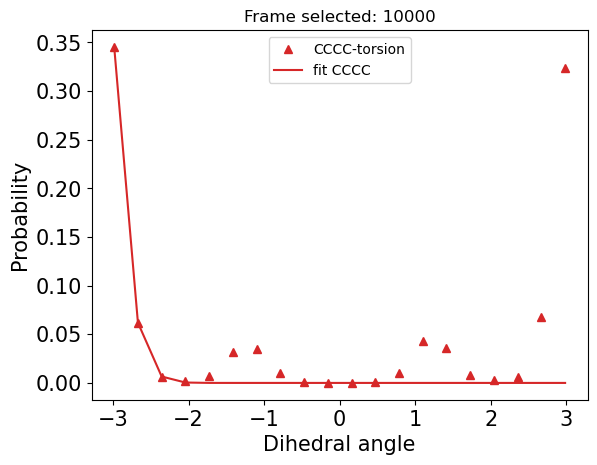

<Figure size 640x480 with 0 Axes>

In [46]:
#Draw 10,100,1000 random samples of a dihedral angle

def histogram_bincenters(CCCC_short, bins=20):    
    counts, edges = np.histogram(CCCC_short, bins=bins, density=True)
    centers = (edges[:-1] + edges[1:]) / 2
    density = counts / np.sum(counts)
    return centers, density

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

#### Now we define a function to fit the gaussian with curve fit

def fit_gauss(x,y):
    parameters, covariance = curve_fit(gauss, x, y)
    fit_a = parameters[0]
    fit_x0 = parameters[1]
    fit_sigma = parameters[2]
    print("a:",fit_a,"x0:",fit_x0,"fit_sigma:",fit_sigma)
    fit_y = gauss(centers, fit_a, fit_x0,fit_sigma)
    return fit_y,[fit_a,fit_x0,fit_sigma] 

frame_length = [10, 100, 1000, 10000]
for i in frame_length:
    rands = np.random.randint(10000, size=i)
    print('Frame number selected:', i)
    
    CCCC_short = CCCC_torsion[rands]  # Assuming CCCC_torsion is defined
    centers, density = histogram_bincenters(CCCC_short, bins=20)
    CCCC_short_fit, CCCC_short_fit_params = fit_gauss(centers,density)
    plt.plot(centers, density, '^', label='CCCC-torsion', color="tab:red")
    plt.plot(centers, CCCC_short_fit, '-', label='fit CCCC', color="tab:red")
 

    plt.legend()
    plt.title('Frame selected: ' + str(i))
    plt.xlabel('Dihedral angle', size=15)
    plt.xticks(size=15)
    plt.ylabel('Probability', size=15)
    plt.yticks(size=15)
    plt.show()
    plt.clf()

#Homework problem 3: Gaussian fit assumes that the data is normally distributed i.e unimodal and symmetric, however the distribution of the diheral angles in butane  is multimodal and skewed due to its different stable conformations. Invoking the CLT with large sample number makes no difference.

***Week 1 Homework Question:  What is the probability of being found in the higher free energy C-C-C-C dihedral state?*****

In [97]:
####Week 1 Homework Question: What is the probability of being found in the higher free energy C-C-C-C dihedral state?####

#### Calculate Here #####
#### THis will require the use of np.where() 
###https://numpy.org/doc/stable/reference/generated/numpy.where.html
CCCC_dihe=CCCC_torsion[:,0]
a=np.where(CCCC_dihe<0)
print(a)
print(CCCC_dihe[a])

b=np.where(CCCC_dihe>-2)
print(b)
CCCC_dihe[b]
c=np.where((CCCC_dihe<0) & (CCCC_dihe>-2))
print(c)

#Probability of being between 0 and -2 radians:
print(len(CCCC_dihe[c])/len(CCCC_dihe))


(array([    0,     2,     4, ..., 99995, 99997, 99998], dtype=int64),)
[-3.017584  -3.0726972 -2.62025   ... -2.927324  -2.9303384 -2.9034324]
(array([    1,     3,     5, ..., 99990, 99996, 99999], dtype=int64),)
(array([   15,    16,    17, ..., 99728, 99729, 99730], dtype=int64),)
0.09725


In [114]:
####Week 1 Homework Question: What is the probability of being found in the higher free energy C-C-C-C dihedral state?####
#### Calculate Here #####
#### THis will require the use of np.where()
###https://numpy.org/doc/stable/reference/generated/numpy.where.html
### Highest energy would be found at 0 rad and 6.25 (360 degrees). but 360 degrees doesn't technically exist so we
###calculate around the 0 degrees or radiance
CCCC_dihe=CCCC_torsion[:,0]
a=np.where(CCCC_dihe<0)
print(a)
print(CCCC_dihe[a])
b=np.where(CCCC_dihe>-0.01)
print(b)
CCCC_dihe[b]
c=np.where((CCCC_dihe<0) & (CCCC_dihe>-0.01)) # use this function
print(c)
#
# low probability = high energy = unstable (vice versa)
## What we want to do is show that it has high energy and the probability of finding something there is low
#Probability of being between 0 and -0.01 radians:
print(len(CCCC_dihe[c])/len(CCCC_dihe))

(array([    0,     2,     4, ..., 99995, 99997, 99998], dtype=int64),)
[-3.017584  -3.0726972 -2.62025   ... -2.927324  -2.9303384 -2.9034324]
(array([    1,     3,     5, ..., 99990, 99996, 99999], dtype=int64),)
(array([], dtype=int64),)
0.0


In [98]:
####Week 1 Homework Question: What is the probability of being found in the higher free energy C-C-C-C dihedral state?####

#### Calculate Here #####
#### THis will require the use of np.where() 
###https://numpy.org/doc/stable/reference/generated/numpy.where.html
# Highest energy would be at  0 rad (the eclipsed conformation) 
CCCC_dihe=CCCC_torsion[:,0]

# Find indices where dihedral angle is less than 0 radians
a=np.where(CCCC_dihe<0)
print(a)
print(CCCC_dihe[a])

# Find indices where dihedral angle is greater than -0.1 radians
b=np.where(CCCC_dihe>-0.1)
print(b)
CCCC_dihe[b]

# Find indices where dihedral angle is between 0 and 2 radians
c=np.where((CCCC_dihe<0) & (CCCC_dihe>-0.1))
print(c)

#Probability of being between 0 and -0.1 radians:
print(len(CCCC_dihe[c])/len(CCCC_dihe))


(array([    0,     2,     4, ..., 99995, 99997, 99998], dtype=int64),)
[-3.017584  -3.0726972 -2.62025   ... -2.927324  -2.9303384 -2.9034324]
(array([    1,     3,     5, ..., 99990, 99996, 99999], dtype=int64),)
(array([4547], dtype=int64),)
1e-05


**Class Activity: Are The Bond Angles and Dihedral Angle Correlated?**

r2: 0.0007670501920294082


C:\Users\hainn\AppData\Local\Temp\ipykernel_17100\3736490832.py:6: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = False


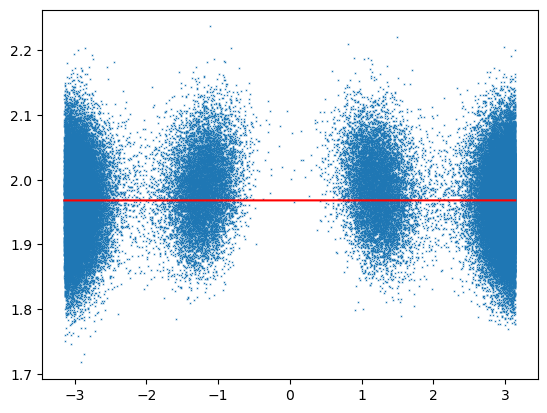

c:\Users\hainn\anaconda3\envs\CHEM101\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hainn\anaconda3\envs\CHEM101\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hainn\anaconda3\envs\CHEM101\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hainn\anaconda3\envs\CHEM101\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

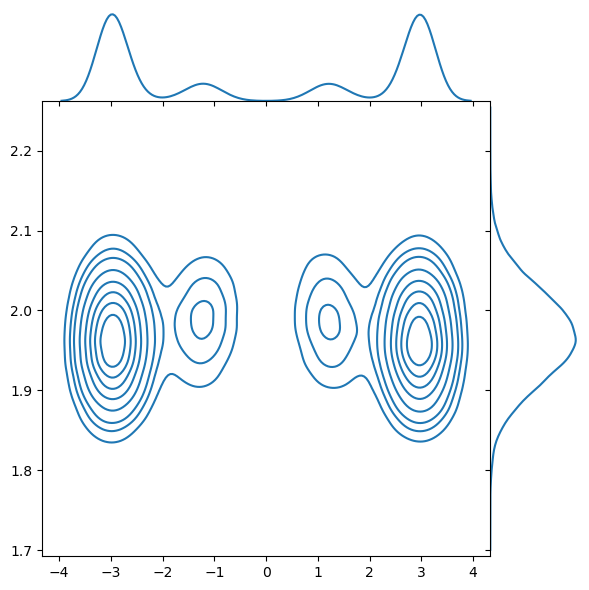

In [99]:
#### COMPLETE IN-CLASS ACTIVITY HERE #####
#Are the bond angle and dihedral correlated?
import pandas as pd

# Disable the use_inf_as_na option
pd.options.mode.use_inf_as_na = False

CCCC_dihe

plt.scatter(CCCC_dihe,ang1,marker='x',s=0.1)
r=np.corrcoef(CCCC_dihe,ang1)
print("r2:",r[0,1])
line_fit=np.polyfit(CCCC_dihe,ang1,1)
line_fit
x=np.linspace(min(CCCC_dihe),max(CCCC_dihe),20)
y = line_fit[1]+x*line_fit[0]
plt.plot(x,y,c='r',label='best fit line')
plt.show()
##### ADD FANCY SEABORN PLOT HERE ######
sns.jointplot(x=CCCC_dihe,y=ang1,kind='kde',space=0,thresh=0)

**Homework Problem 3: Can you express the relationsip between these two quantites using histograms and conditional probabilities ?** 

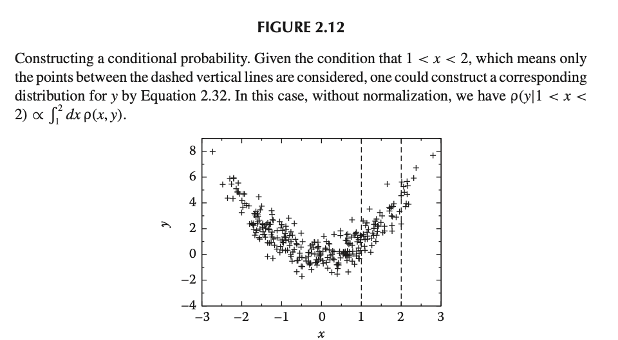

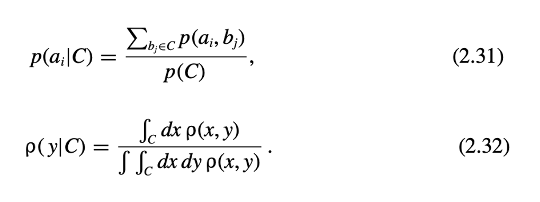

In [100]:
#Homework problem 3 Solution ##

#### THis will require the use of np.where() 
###https://numpy.org/doc/stable/reference/generated/numpy.where.html
CCCC_dihe
a=np.where(CCCC_dihe<0)
print(a)
CCCC_dihe[a]
b=np.where(CCCC_dihe>-2)
print(b)
CCCC_dihe[b]
c=np.where((CCCC_dihe<0) & (CCCC_dihe>-2))
print(c)
CCCC_dihe[c]

(array([    0,     2,     4, ..., 99995, 99997, 99998], dtype=int64),)
(array([    1,     3,     5, ..., 99990, 99996, 99999], dtype=int64),)
(array([   15,    16,    17, ..., 99728, 99729, 99730], dtype=int64),)


array([-0.8760524, -1.5967709, -1.1940633, ..., -1.2735165, -1.7762498,
       -0.8346123], dtype=float32)

In [101]:
#Will Walk through example of Autocorrelation Function (ACF) calculation here#
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else numpy.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return numpy.array(corr)
    
print(ang1)
print(ang1[1:])
print(ang1[:-1])

[1.8561319 2.022321  2.0214653 ... 1.9835722 1.93657   1.9462966]
[2.022321  2.0214653 2.025708  ... 1.9835722 1.93657   1.9462966]
[1.8561319 2.022321  2.0214653 ... 1.9997344 1.9835722 1.93657  ]


**Class Activity: Lets Calculate the Autocorrelation Times of C-C Bonds, C-C-C Angles, and C-C-C-C Dihedrals**

https://ipython-books.github.io/103-computing-the-autocorrelation-of-a-time-series/

[0.00000e+00 2.00002e-01 4.00004e-01 ... 1.99996e+04 1.99998e+04
 2.00000e+04]


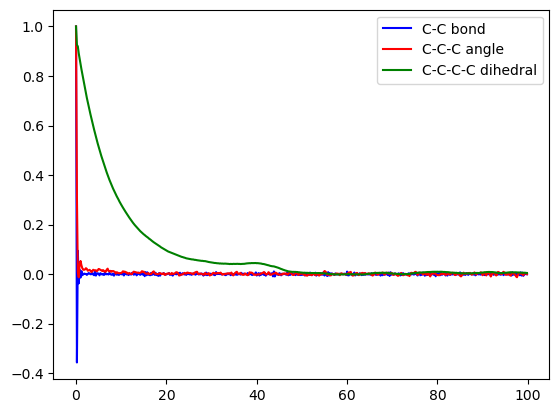

In [102]:
#Lets Calculate the autocorrelation times for bond lengths, bond angles, and torsions:
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else numpy.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return numpy.array(corr)

#time in picoseconds
time=np.linspace(0,20000,traj.n_frames)
print(time)

lags=range(500)
#C1C2bondlength[:,0]
bond_autocor=autocorr1(C1C2bondlength[:,0],lags)
ang_autocor=autocorr1(ang1,lags)
dihe_autocor=autocorr1(np.cos(CCCC_torsion[:,0]),lags)
plt.plot(time[lags],bond_autocor,color='b',label='C-C bond')
plt.plot(time[lags],ang_autocor,color='r',label='C-C-C angle')
plt.plot(time[lags],dihe_autocor,color='g',label='C-C-C-C dihedral')
plt.legend()

**Class Activity: Lets Dig Into force field XML file and make plots of the force field torsion terms**

Documentation of Torsion Term Conventions:

https://ambermd.org/doc12/Amber21.pdf#page=264

http://docs.openmm.org/latest/userguide/application/05_creating_ffs.html#basic-concepts

From Butane.gaff2.xml

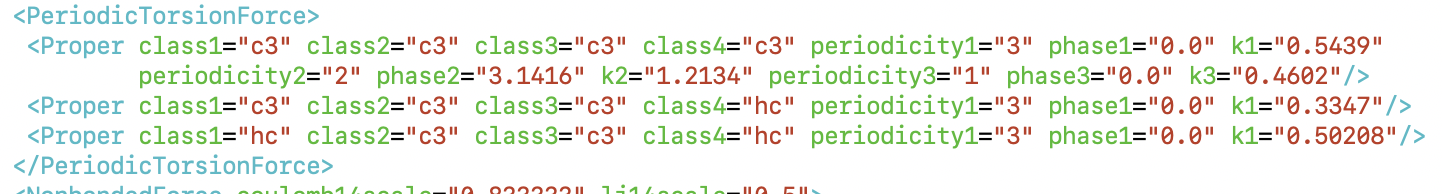

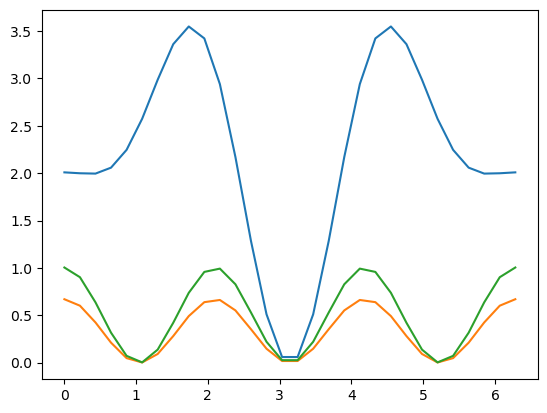

In [33]:
#Plot The Torsion Force Field Terms

#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets write a function to plot the values of force field terms

#Plot The Torsion Force Field Terms

#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets write a function to plot the values of force field terms


def calc_torsion_energy(angle,k1,period,phase):
     e=k1*(1+np.cos(period*angle-phase))
     return e

def CCCC_torsionE(angle):
 e1=calc_torsion_energy(angle,0.4602,1,0)
 e2=calc_torsion_energy(angle,1.2134,2,3.1416)
 e3=calc_torsion_energy(angle,0.5439,3,0)
 return e1+e2+e3

def CCCH_torsionE(angle):
 e1=calc_torsion_energy(angle,0.3347,3,0)
 return e1

def HCCH_torsionE(angle):
 e1=calc_torsion_energy(angle,0.50208,3,0)
 return e1

CCCC_e=CCCC_torsionE(rad_ang)
CCCH_e=CCCH_torsionE(rad_ang)
HCCH_e=HCCH_torsionE(rad_ang)


plt.plot(rad_ang,CCCC_e)
plt.plot(rad_ang,CCCH_e)
plt.plot(rad_ang,HCCH_e)

In [104]:
##Lets Review all our atoms as we attempt to tabulate all the relevant torsion terms
atoms, bonds = traj.topology.to_dataframe()
atoms

serial name element  resSeq resName  chainID segmentID
0        1   C1       C       1     NBU        0          
1        2  H11       H       1     NBU        0          
2        3  H12       H       1     NBU        0          
3        4  H13       H       1     NBU        0          
4        5   C2       C       1     NBU        0          
5        6  H21       H       1     NBU        0          
6        7  H22       H       1     NBU        0          
7        8   C3       C       1     NBU        0          
8        9  H31       H       1     NBU        0          
9       10  H32       H       1     NBU        0          
10      11   C4       C       1     NBU        0          
11      12  H41       H       1     NBU        0          
12      13  H42       H       1     NBU        0          
13      14  H43       H       1     NBU        0

 <PeriodicTorsionForce>
  <Proper class1="c3" class2="c3" class3="c3" class4="c3" periodicity1="3" phase1="0.0" k1="0.5439" 
          periodicity2="2" phase2="3.1416" k2="1.2134" periodicity3="1" phase3="0.0" k3="0.4602"/>
  <Proper class1="c3" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.3347"/>
  <Proper class1="hc" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.50208"/>

In [105]:
#Lets Consider Up All The Torsions Along the Central Carbon
#Atomnames: (H41,H42,H43)-C4-C3(H31,H32)-C2(H21,H22)-C1(H11,H12,H13)
#Atomnumbers: (13,12,11)-10-(8,9)7-4(5,6)-0(1,2,3)

#Lets Tally Up All The Torsions Along the Central Carbon
#Atomnames: (H41,H42,H43)-C4-C3(H31,H32)-C2(H21,H22)-C1(H11,H12,H13)
#Atomnumbers: (13,12,11)-10-(8,9)7-4(5,6)-0(1,2,3)

#Central Torsion: 
#C-C-C-C -[10,7,4,0]
#H-C-C-H; [8,7,4,5],[8,7,4,6],[9,7,4,5],[9,7,4,6]  
#H-C-C-H; [6,4,0,1],[6,4,0,2],[6,4,0,3],[5,4,0,1],[5,4,0,2],[5,4,0,3]
#H-C-C-H; [13,10,7,8],[12,10,7,8],[11,10,7,8],[13,10,7,9],[12,10,7,9],[11,10,7,9]
#C-C-C-H -[10,7,4,1],[10,7,4,2],[10,7,4,2],[4,7,10,13],[4,7,10,12],[4,7,10,13]

CCCC_index=[10,7,4,0]
HCCH_indices=[[8,7,4,5],[8,7,4,6],[9,7,4,5],[9,7,4,6],[6,4,0,1],[6,4,0,2],[6,4,0,3],[5,4,0,1],[5,4,0,2],[5,4,0,3],[13,10,7,8],[12,10,7,8],[11,10,7,8],[13,10,7,9],[12,10,7,9],[11,10,7,9]]
CCCH_indices=[10,7,4,1],[10,7,4,2],[10,7,4,2],[4,7,10,13],[4,7,10,12],[4,7,10,13]

HCCH_torsions=md.compute_dihedrals(traj, HCCH_indices)
CCCH_torsions=md.compute_dihedrals(traj, CCCH_indices)
CCCC_torsion=md.compute_dihedrals(traj, [CCCC_index])


In [106]:
print(HCCH_indices)
print(HCCH_torsions)

[[8, 7, 4, 5], [8, 7, 4, 6], [9, 7, 4, 5], [9, 7, 4, 6], [6, 4, 0, 1], [6, 4, 0, 2], [6, 4, 0, 3], [5, 4, 0, 1], [5, 4, 0, 2], [5, 4, 0, 3], [13, 10, 7, 8], [12, 10, 7, 8], [11, 10, 7, 8], [13, 10, 7, 9], [12, 10, 7, 9], [11, 10, 7, 9]]
[[-2.9507687  -0.83756596  1.3219734  ... -0.9774021   1.0047104
   3.0987074 ]
 [ 2.8389983  -1.4658111   0.68487287 ... -1.2639496   0.75289094
   2.937946  ]
 [-3.075881   -0.97410023  1.0676782  ... -1.090856    0.8985784
   2.8778007 ]
 ...
 [ 3.1286001  -1.3244603   1.1744478  ... -2.5526142  -0.6812164
   1.403507  ]
 [-2.8034859  -0.72750604  1.3707987  ... -3.0637705  -1.1707402
   1.0471839 ]
 [ 2.9770694  -1.1817983   0.8047219  ...  2.9650908  -1.2585353
   0.8620211 ]]


**Homework Problem #5: Many of These Correlations will be highly Correlated Select Some Torsions that are Correlated, and some that are not, and make scatter plots of their relationships**

For a Torsion Angle Pair that is highly correlated, can you find a relatively constant offset?  

For a Torsion Angle Pair that are less correlated, how can you interpret their scatter plots?

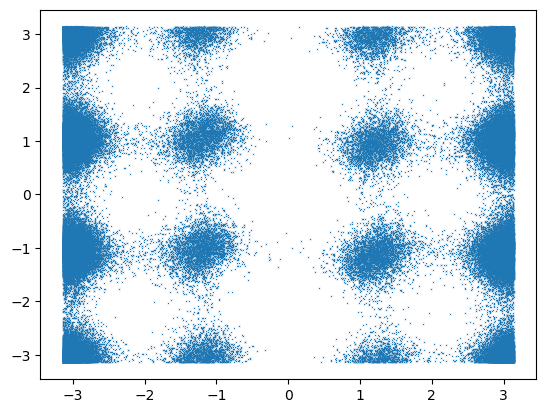

<Figure size 640x480 with 0 Axes>

In [107]:
####WEEK 1 Homework Problem 5 - Correlations in torsion paramters###
#PLOT SOME TORSIONS THAT YOU EXPECT TO BE HIGHLY CORRELATED - EXPLAIN WHY - EXPLAIN WHAT yOU SEE
#Perhaps Consider CCCC vs. [8,7,4,5]



#PLOT SOME TORSIONS THAT YOU EXPECT TO BE UNCORRELATED - Explain what you see
#Perhaps Consider CCCC vs. [12,10,7,9]?

#For Example:
plt.scatter(CCCC_torsion,HCCH_torsions[:,14],marker='x',s=0.05)
plt.show()
plt.clf()


Line Parameters: [0.62873821 0.00170694]


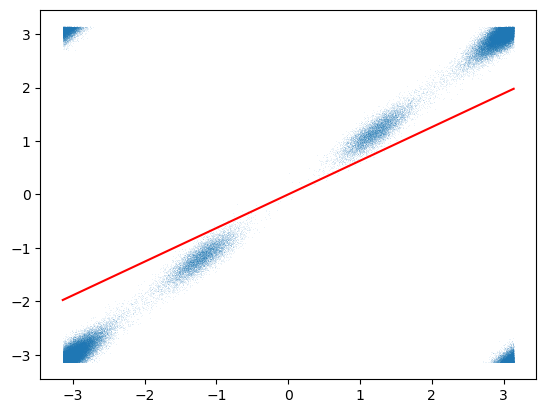

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


r2: 0.6317304333223477
Line Parameters: [0.01198349 0.06323703]


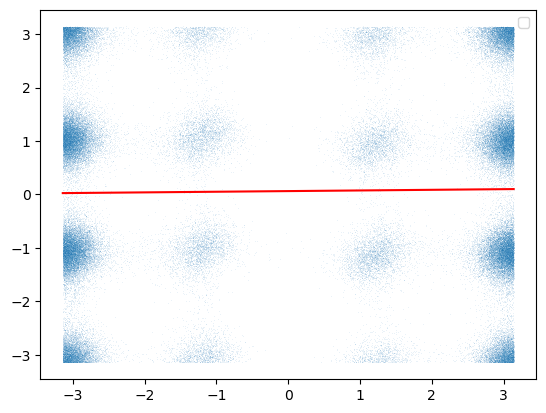

r2: 0.017260777583798664
Line Parameters: [-0.080648   -0.85854189]


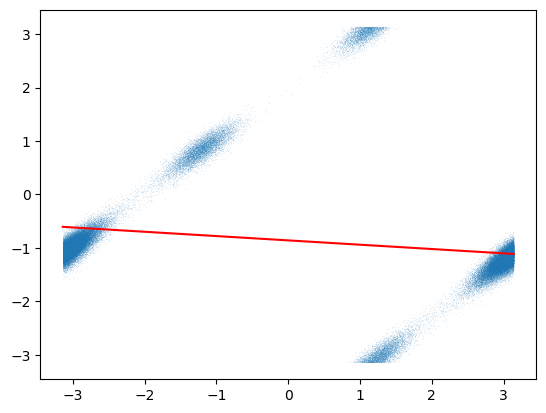

r2: -0.19932919085943274
Line Parameters: [ 0.01753705 -0.09831133]


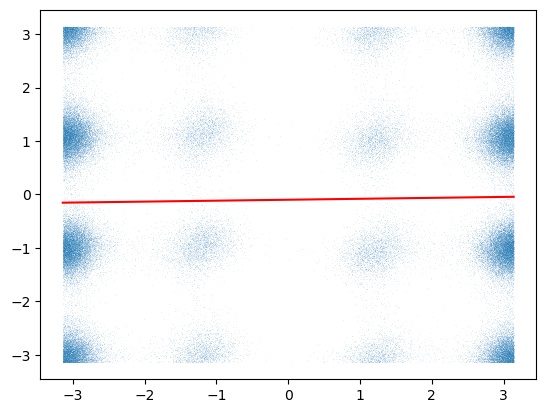

r2: 0.02483240499367604
Line Parameters: [0.62873821 0.00170694]


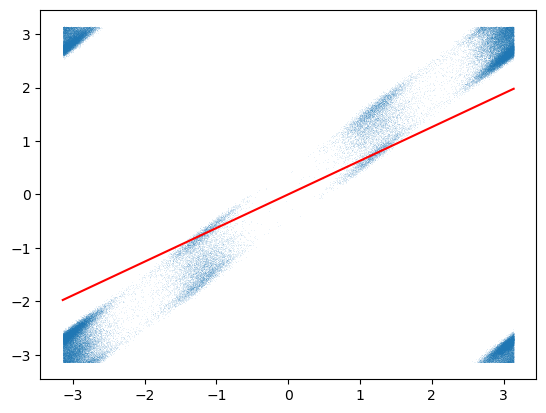

r2: 0.6317304333223477
Line Parameters: [ 0.01046854 -0.01426776]


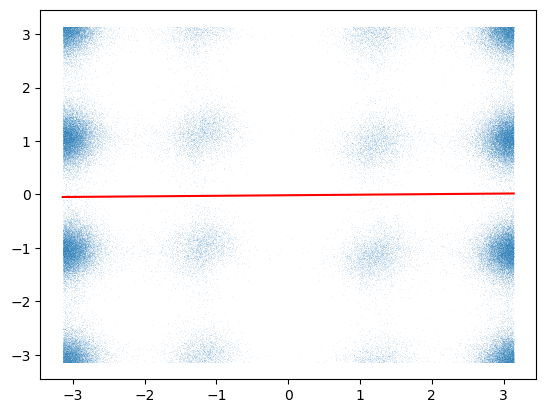

r2: 0.015032485961912416


<Figure size 640x480 with 0 Axes>

In [122]:
#####Are the CCCC vs. HCCH[8,7,4,5] torsions correlated?##### 
###Calculate and plot a best fit line, and calculate the correlation coefficient####

#PLOT SOME TORSIONS THAT YOU EXPECT TO BE CORRELATED 

plt.scatter(CCCC_torsion[:,0],HCCH_torsions[:,0],marker='x',s=0.1,linewidth=0.05)

line_fit=np.polyfit(CCCC_torsion[:,0],HCCH_torsions[:,0],1)
x = np.linspace(min(CCCC_torsion[:,0]), max(HCCH_torsions[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()
plt.clf()

r=np.corrcoef(CCCC_torsion[:,0], HCCH_torsions[:,0])
print("r2:",r[0,1])


#####Are the CCCC vs. HCCH[12,10,7,9] torsions correlated?##### 
#PLOT SOME TORSIONS THAT YOU EXPECT TO BE UNCORRELATED 

plt.scatter(CCCC_torsion[:,0],HCCH_torsions[:,14],marker='x',s=0.1,linewidth=0.05)

line_fit=np.polyfit(CCCC_torsion[:,0],HCCH_torsions[:,14],1)
x = np.linspace(min(CCCC_torsion[:,0]), max(HCCH_torsions[:,14]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r')
plt.legend()
plt.show()
plt.clf()

r=np.corrcoef(CCCC_torsion[:,0], HCCH_torsions[:,14])
print("r2:",r[0,1])

#####Are the CCCC vs. HCCH[8,7,4,5] torsions correlated?##### 
plt.scatter(CCCC_torsion[:,0],HCCH_torsions[:,1],marker='x',s=0.1,linewidth=0.05)

line_fit=np.polyfit(CCCC_torsion[:,0],HCCH_torsions[:,1],1)
x = np.linspace(min(CCCC_torsion[:,0]), max(HCCH_torsions[:,1]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()
plt.clf()

r=np.corrcoef(CCCC_torsion[:,0], HCCH_torsions[:,1])
print("r2:",r[0,1])

plt.scatter(CCCC_torsion[:,0],HCCH_torsions[:,4],marker='x',s=0.1,linewidth=0.05)

line_fit=np.polyfit(CCCC_torsion[:,0],HCCH_torsions[:,4],1)
x = np.linspace(min(CCCC_torsion[:,0]), max(HCCH_torsions[:,4]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()
plt.clf()

r=np.corrcoef(CCCC_torsion[:,0], HCCH_torsions[:,4])
print("r2:",r[0,1])

#####Are the CCCC vs. CCCH[8,7,4,5] torsions correlated?##### 
plt.scatter(CCCC_torsion[:,0],CCCH_torsions[:,0],marker='x',s=0.1,linewidth=0.05)

line_fit=np.polyfit(CCCC_torsion[:,0],HCCH_torsions[:,0],1)
x = np.linspace(min(CCCC_torsion[:,0]), max(HCCH_torsions[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()
plt.clf()

r=np.corrcoef(CCCC_torsion[:,0], HCCH_torsions[:,0])
print("r2:",r[0,1])

#####Are the CCCC vs. CCCH torsions correlated?##### 
plt.scatter(CCCC_torsion[:,0],CCCH_torsions[:,5],marker='x',s=0.1,linewidth=0.05)

line_fit=np.polyfit(CCCC_torsion[:,0],CCCH_torsions[:,5],1)
x = np.linspace(min(CCCC_torsion[:,0]), max(CCCH_torsions[:,5]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()
plt.clf()

r=np.corrcoef(CCCC_torsion[:,0], CCCH_torsions[:,5])
print("r2:",r[0,1])


Explanation : the r2 value for CCCC vs. HCCH [8,7,4,5] torsions are higher and show more positive correlation compared to the CCCC vs. HCCH [12,10,7,9] torsions. The higher correlation of CCCC vs. HCCH torsions are due to steric hindrances that hinder the occupation of some CCCC and HCCH torsions values.

**Homework Problem #6: SELECT TWO TORSIONS THAT YOU EXPECT TO HAVE A SYSTEMATIC OFFSET 
CALCULATE THEIR OFFSET IN EACH FRAME - EXPLAIN YOUR RESULT**

(0.0, 1000.0)

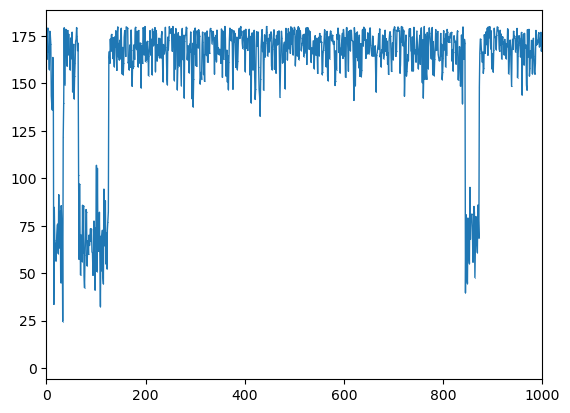

In [127]:
#SELECT TWO TORSIONS THAT YOU EXPECT TO HAVE A SYSTEMATIC OFFSET 
#CALCULATE THEIR OFFSET IN EACH FRAME - EXPLAIN YOUR RESULT

#print(np.where(HCCH_torsions<=0))
HCCH_tor_offset=np.rad2deg(HCCH_torsions[:,0])
#print(HCCH_tor_offset)
#for i in range(0,len(HCCH_tor_offset)):
#    if(HCCH_tor_offset[i]<0):
#        HCCH_tor_offset[i]+=360
        
plt.plot(np.abs(HCCH_tor_offset),marker='x',markersize=.1,linewidth=1)
plt.xlim([0,1000])

(0.0, 1000.0)

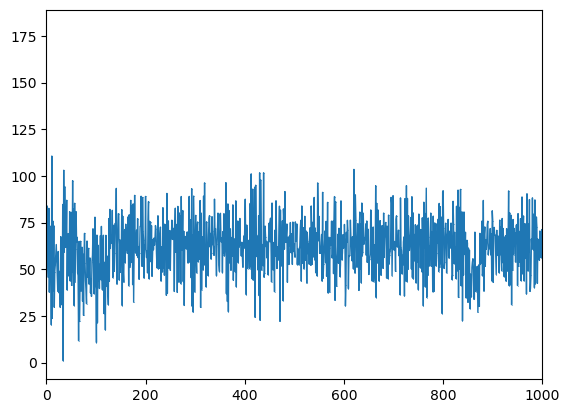

In [128]:
#print(np.where(HCCH_torsions<=0))
HCCH_tor_offset=np.rad2deg(HCCH_torsions[:,1])
#print(HCCH_tor_offset)
#for i in range(0,len(HCCH_tor_offset)):
#    if(HCCH_tor_offset[i]<0):
#        HCCH_tor_offset[i]+=360
        
plt.plot(np.abs(HCCH_tor_offset),marker='x',markersize=.1,linewidth=1)
plt.xlim([0,1000])

(0.0, 1000.0)

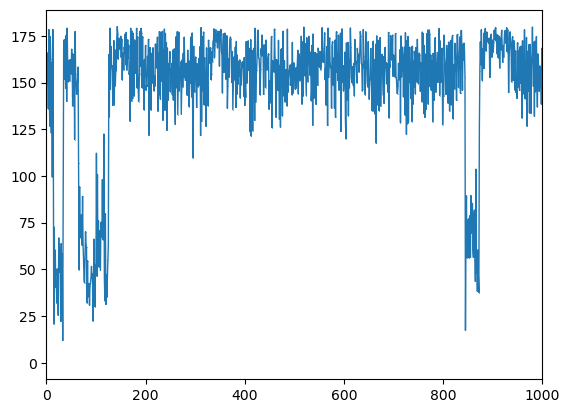

In [129]:
#print(np.where(CCCH_torsions<=0))
CCCH_tor_offset=np.rad2deg(CCCH_torsions[:,0])
#print(CCCH_tor_offset)
#for i in range(0,len(CCCH_tor_offset)):
#    if(CCCH_tor_offset[i]<0):
#        CCCH_tor_offset[i]+=360
        
plt.plot(np.abs(CCCH_tor_offset),marker='x',markersize=.1,linewidth=1)
plt.xlim([0,1000])

(0.0, 1000.0)

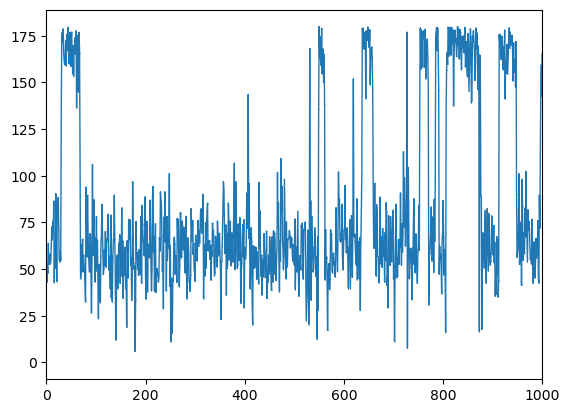

In [110]:
#print(np.where(HCCH_torsions<=0))
HCCH_tor_offset=np.rad2deg(HCCH_torsions[:,14])
#print(HCCH_tor_offset)
#for i in range(0,len(HCCH_tor_offset)):
#    if(HCCH_tor_offset[i]<0):
#        HCCH_tor_offset[i]+=360
        
plt.plot(np.abs(HCCH_tor_offset),marker='x',markersize=.1,linewidth=1)
plt.xlim([0,1000])

Explanation: The systematic offset occurs between the torsion angles of butane because it prefers to adopt the staggered conformations due to lower steric hindrance and lower potential energy angles.The butane trajectory of torsion angles above shows that shorttime intervals between different dihedral values is correlated and the values are not random but are evolved from previous values.





***WEEK 2 Homework Problem #1: Lets modify the C-C-C-C Torsion Potential to change the dihedral distribution***


Lets try to lower the dihedral barriers for torsion angles of 1 radian (~60 degrees)
This means we need to to come up with a torsion potential, potentially by using multiple terms with different phases, to equalize the free energy of each C-C-C-C torsion basin (increasing the free energy at $\pi$ and lowering 
free energy at $\pi$/3

Once you've come up with torsion terms you're happy with, you'll need to make a copy of the butane.gaff2.xml, add in the additional torsion terms you have come up with, and run a new simulation.  Then plot the C-C-C-C dihedral histogram or PMF, and compare it to the simulation with original force field.

It would be great if you came up with some kind of fitting routine to determine the coefficients of torsions, perhaps by targeting a gaussian, or you can try to arrive at by hand using something like this:

https://www.desmos.com/calculator/ea1qhzjnuf

**Class Activity: Lets Dig Into force field XML file and make plots of the force field torsion terms**

Documentation of Torsion Term Conventions:

https://ambermd.org/doc12/Amber21.pdf#page=264

http://docs.openmm.org/latest/userguide/application/05_creating_ffs.html#basic-concepts

From Butane.gaff2.xml

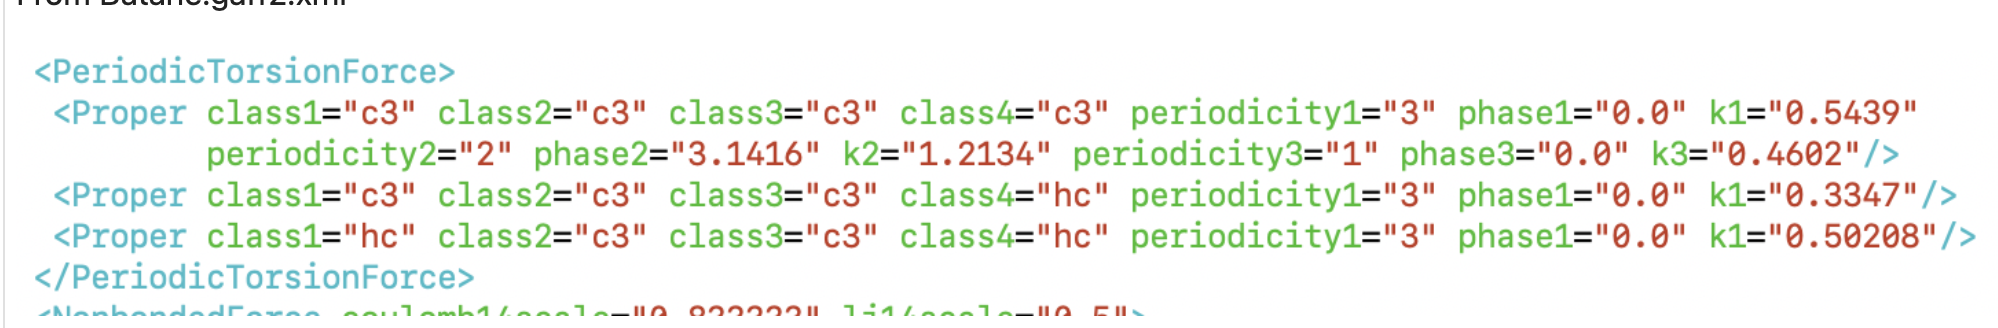

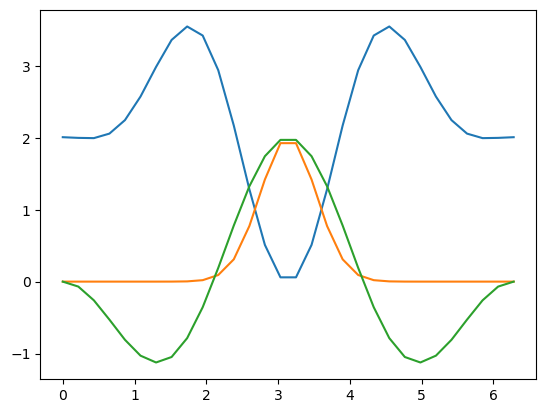

In [34]:
###SOLUTION#####

#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets write a function to plot the values of force field terms


def calc_torsion_energy(angle,k1,period,phase):
     e=k1*(1+np.cos(period*angle-phase))
     return e

def CCCC_torsionE(angle):
 e1=calc_torsion_energy(angle,0.4602,1,0)
 e2=calc_torsion_energy(angle,1.2134,2,3.1416)
 e3=calc_torsion_energy(angle,0.5439,3,0)
 return e1+e2+e3

plt.plot(rad_ang,CCCC_e)

#We want to mimic a gaussian potential that adds potential energy when the CCCC diehdral = pi = 180 degrees
#We can think of this as approximating a guassian center at theta= 180
###Now we define a gaussian function that we'll fit to our probability densities

def gauss(x, a, x0, sigma):
    return (a*np.exp(-(x-x0)**2/(2*sigma**2)))

#Here is what we want our dihedral correction to look like:

gauss_cor = gauss(rad_ang, 2, np.pi, np.pi/8)
plt.plot(rad_ang,gauss_cor)

#Here I come up with a correction that should have the desired effect:

def TorsionCorrection(angle):
 e1=calc_torsion_energy(angle,-1,1,0)
 e2=calc_torsion_energy(angle,1,2,0)
 #e3=calc_torsion_energy(angle,0.5439,3,0)
 return e1+e2

torsion_cor=TorsionCorrection(rad_ang)

plt.plot(rad_ang,torsion_cor)

***WEEK 2 Homework Problem #2 Attempt to run a new MD Simulation with your modified torsion potential***

Once you have made a torsion correction you like make a new force field file 'butane.gaff2.cor1.xml'.

Run a new simulation with this force field and compare the dihedral distributions 

In [18]:
#RUN NEW MD SIMULATION HERE#

workdir='./work2/'
datadir='./data/'
outdir='./out2/'
PDB_file_name = datadir+'butane.pdb'
forcefield_file_name = datadir+'butane.gaff2.cor1.xml'

#if not os.path.exists(workDir):
#    os.makedirs(workDir)
    
print(PDB_file_name)
print(forcefield_file_name)

pdb = mm.app.PDBFile(PDB_file_name)
forcefield = mm.app.ForceField(forcefield_file_name)

system = forcefield.createSystem(pdb.topology, nonbondedMethod=mm.app.NoCutoff, constraints=mm.app.HBonds)
integrator = mm.LangevinIntegrator(298.15*kelvin, 5.0/picosecond, 2.0*femtoseconds)
integrator.setConstraintTolerance(1e-5)
platform = mm.Platform.getPlatformByName('Reference')
simulation = app.Simulation(pdb.topology, system, integrator, platform)
simulation.context.setPositions(pdb.positions)

./data/butane.pdb
./data/butane.gaff2.cor1.xml


In [19]:
print('Minimizing...')

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")

simulation.minimizeEnergy(maxIterations=100)

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

Minimizing...
Potential energy before minimization is 8.224328691614343 kJ/mol
Potential energy after minimization is 7.72207171731975 kJ/mol


In [20]:
from sys import stdout

print('Equilibrating...')

simulation.reporters.append(app.StateDataReporter(stdout, 1000, step=True, 
    potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(150.0*kelvin)
simulation.step(2500)

Equilibrating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
1000,43.88238635804304,289.2462602666023
2000,53.14465994961171,211.04449585825847


In [ ]:
os.path.join(workdir, "butane_dim.xtc")

In [22]:
import mdtraj as md
traj = md.load(os.path.join(workdir, "butane_dim.xtc"), top=PDB_file_name)
traj


<mdtraj.Trajectory with 100000 frames, 14 atoms, 1 residues, without unitcells at 0x1ef5f786790>

In [23]:
atoms, bonds = traj.topology.to_dataframe()
atoms

serial name element  resSeq resName  chainID segmentID
0        1   C1       C       1     NBU        0          
1        2  H11       H       1     NBU        0          
2        3  H12       H       1     NBU        0          
3        4  H13       H       1     NBU        0          
4        5   C2       C       1     NBU        0          
5        6  H21       H       1     NBU        0          
6        7  H22       H       1     NBU        0          
7        8   C3       C       1     NBU        0          
8        9  H31       H       1     NBU        0          
9       10  H32       H       1     NBU        0          
10      11   C4       C       1     NBU        0          
11      12  H41       H       1     NBU        0          
12      13  H42       H       1     NBU        0          
13      14  H43       H       1     NBU        0

In [24]:
#Lets select the topology
top=traj.topology
top

<mdtraj.Topology with 1 chains, 1 residues, 14 atoms, 13 bonds at 0x1ef6f3555d0>

In [25]:
C_sel=top.select("type C")
print(C_sel)
top.atom(10)
for atom in C_sel:
    print(atom,top.atom(atom))

H_sel=top.select("type H")
for atom in H_sel:
    print(atom,top.atom(atom))

[ 0  4  7 10]
0 NBU1-C1
4 NBU1-C2
7 NBU1-C3
10 NBU1-C4
1 NBU1-H11
2 NBU1-H12
3 NBU1-H13
5 NBU1-H21
6 NBU1-H22
8 NBU1-H31
9 NBU1-H32
11 NBU1-H41
12 NBU1-H42
13 NBU1-H43


In [26]:
#Select All Carbon Atoms
C_sel=top.select("type C")
print(C_sel)
#Confirm that we have selected what we think we have
for atom in C_sel:
    print(top.atom(atom))

[ 0  4  7 10]
NBU1-C1
NBU1-C2
NBU1-C3
NBU1-C4


(100000, 2)
[[1.8561319 1.8410031]
 [2.022321  1.9602604]
 [2.0214653 1.9941894]
 ...
 [1.9835722 1.9448099]
 [1.93657   1.9164178]
 [1.9462966 1.9813364]]


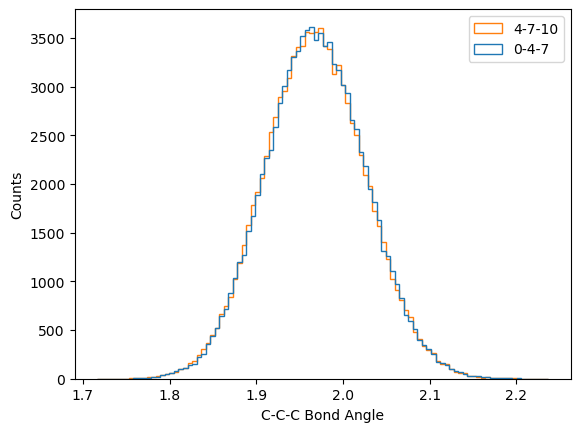

[[-3.017584 ]
 [ 2.8320909]
 [-3.0726972]
 ...
 [-2.9303384]
 [-2.9034324]
 [ 2.9167614]]
[[-172.89482]
 [ 162.26685]
 [-176.05257]
 ...
 [-167.89601]
 [-166.35442]
 [ 167.1181 ]]


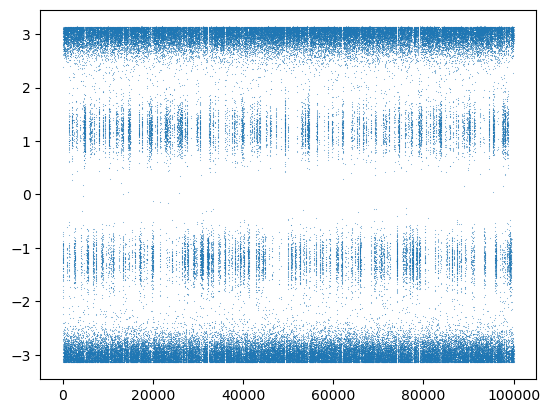

In [27]:
###Class Room Solution###
##Lets Compute Some Bond Angles & Torsions##
Angle1=[0,4,7]
Angle2=[4,7,10]

ang = md.compute_angles(traj,[Angle1,Angle2])
print(np.shape(ang))
print(ang)

ang1=ang[:,0]
ang2=ang[:,1]

plt.plot(ang1,linewidth=0,marker='x',markersize=.1)
plt.plot(ang2,linewidth=0,marker='x',markersize=.1)
plt.clf()

plt.hist(ang,bins=100,histtype='step',label=['0-4-7','4-7-10'])
plt.legend()
plt.xlabel('C-C-C Bond Angle')
plt.ylabel('Counts')
plt.show()
#plt.scatter(ang1,marker='o',s=0.1)

CCCC_index=[10,7,4,0]
CCCC_torsion=md.compute_dihedrals(traj, [CCCC_index])
print(CCCC_torsion)
print(np.rad2deg(CCCC_torsion))

plt.plot(CCCC_torsion,marker='x',markersize=.1,linewidth=0)
#plt.xlim([0,100])

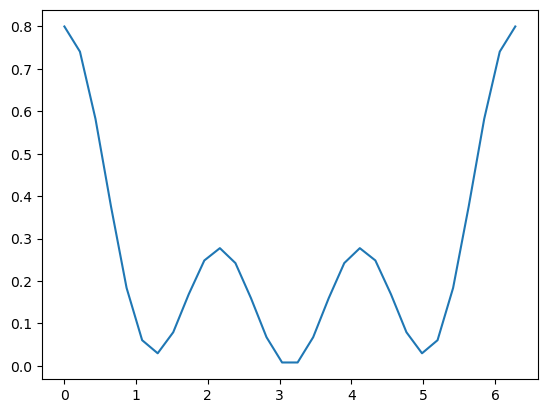

In [84]:
#Plot The Torsion Force Field Terms

#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets write a function to plot the values of force field terms

#Plot The Torsion Force Field Terms

#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets write a function to plot the values of force field terms


def calc_torsion_energy(angle,k1,period,phase):
     e=k1*(1+np.cos(period*angle-phase))
     return e

def CCCC_torsionE(angle):
 e1=calc_torsion_energy(angle,0.2,3,0)
 e2=calc_torsion_energy(angle,-0.15,2,3.1416)
 e3=calc_torsion_energy(angle,0.2,1,0)
 return e1+e2+e3

#def CCCH_torsionE(angle):
# e1=calc_torsion_energy(angle,0.3347,3,0)
 #return e1

#def HCCH_torsionE(angle):
 #e1=calc_torsion_energy(angle,0.50208,3,0)
 #return e1

CCCC_e=CCCC_torsionE(rad_ang)
#CCCH_e=CCCH_torsionE(rad_ang)
#HCCH_e=HCCH_torsionE(rad_ang)


plt.plot(rad_ang,CCCC_e)
#plt.plot(rad_ang,CCCH_e)
#plt.plot(rad_ang,HCCH_e)

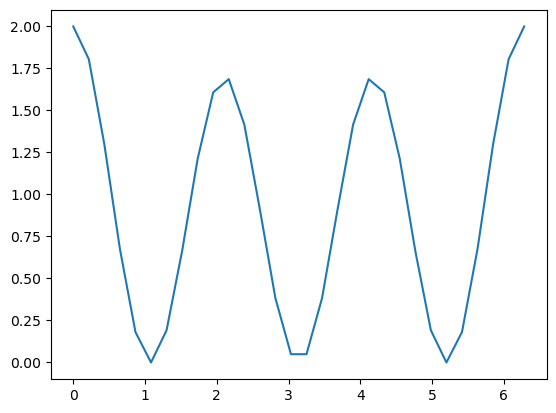

In [6]:
#Plot The Torsion Force Field Terms

#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets write a function to plot the values of force field terms

#Plot The Torsion Force Field Terms

#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets write a function to plot the values of force field terms


def calc_torsion_energy(angle,k1,period,phase):
     e=k1*(1+np.cos(period*angle-phase))
     return e

def CCCC_torsionE(angle):
 e1=calc_torsion_energy(angle,0.9,3,0)
 e2=calc_torsion_energy(angle,-0.1,2,3.1416)
 e3=calc_torsion_energy(angle,0.1,1,0)
 return e1+e2+e3

#def CCCH_torsionE(angle):
# e1=calc_torsion_energy(angle,0.3347,3,0)
 #return e1

#def HCCH_torsionE(angle):
 #e1=calc_torsion_energy(angle,0.50208,3,0)
 #return e1

CCCC_e=CCCC_torsionE(rad_ang)
#CCCH_e=CCCH_torsionE(rad_ang)
#HCCH_e=HCCH_torsionE(rad_ang)


plt.plot(rad_ang,CCCC_e)
#plt.plot(rad_ang,CCCH_e)
#plt.plot(rad_ang,HCCH_e)

In [ ]:
#Compare New Dihedral Distribution HERE)

**WEEK 2 Homework Problem #3 Plot the LJ and Coulumb Forcefield Potentials for 3 types of atom pairs**

#CHECK THE COMBINATION RULES USED FOR OPENMM##


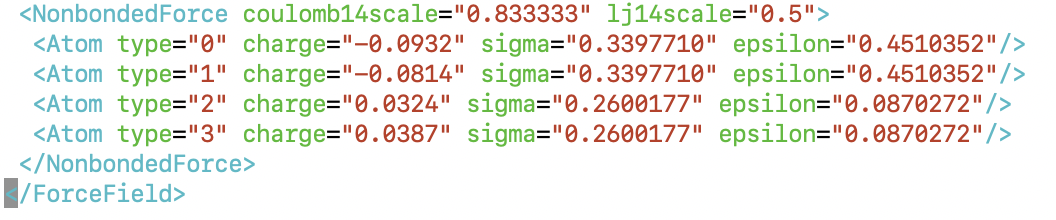




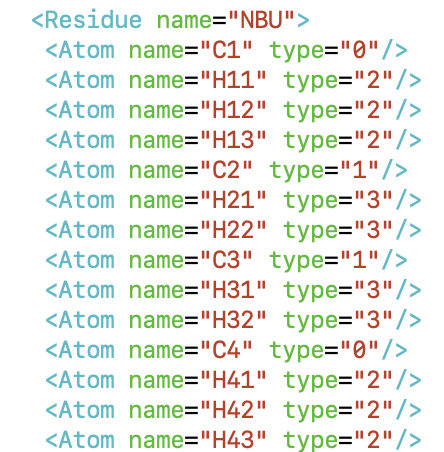

In [ ]:
#Plot LJ and Couloumb Potentionals Here